In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import skew

import calendar
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

%matplotlib inline

# Data Collection

In [4]:
hotel_booking_1 = pd.read_csv("H1.csv"); hotel_booking_2 = pd.read_csv("H2.csv")

In [5]:
hotel_booking_1.shape, hotel_booking_2.shape

((40060, 31), (79330, 31))

In [6]:
hotel_booking_1.head(2)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [7]:
hotel_booking_2.head(2)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01


In [9]:
hotel_booking_1.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')

In [10]:
hotel_booking_2.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')

# Data Integration

In [11]:
hotel_booking = pd.concat([hotel_booking_1, hotel_booking_2], axis=0).reset_index(drop=True)

In [12]:
hotel_booking.shape

(119390, 31)

In [13]:
hotel_booking.head(2)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0.0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0.0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [14]:
hotel_booking.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [15]:
hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   IsCanceled                   119390 non-null  int64  
 1   LeadTime                     119390 non-null  int64  
 2   ArrivalDateYear              119390 non-null  int64  
 3   ArrivalDateMonth             119390 non-null  object 
 4   ArrivalDateWeekNumber        119390 non-null  int64  
 5   ArrivalDateDayOfMonth        119390 non-null  int64  
 6   StaysInWeekendNights         119390 non-null  int64  
 7   StaysInWeekNights            119390 non-null  int64  
 8   Adults                       119390 non-null  int64  
 9   Children                     119386 non-null  float64
 10  Babies                       119390 non-null  int64  
 11  Meal                         119390 non-null  object 
 12  Country                      118902 non-null  object 
 13 

# Data Preprocessing

### Duplicates Checking

Drop Duplicates if any

In [16]:
hotel_booking.duplicated().sum()

31994

In [19]:
hotel_booking.drop_duplicates(inplace=True)

In [20]:
hotel_booking.duplicated().sum()

0

In [21]:
hotel_booking.shape

(87396, 31)

### Missing Values handling

To address null values, if any

In [26]:
# saving total na values
missing_values_count = hotel_booking.isna().sum()

# Filter out columns with missing values greater than 0
missing_values_gt_0 = missing_values_count[missing_values_count > 0]

missing_values_gt_0

Children      4
Country     452
dtype: int64

Country has 452 null values and Children have 4 values. 

In [27]:
hotel_booking.Agent.value_counts()


Agent
   9    28759
 240    13028
NULL    12193
  14     3349
   7     3300
        ...  
 257        1
 291        1
  93        1
 483        1
 449        1
Name: count, Length: 334, dtype: int64

In [28]:
hotel_booking.Company.value_counts()

Company
NULL    82137
  40      851
 223      503
  45      238
 153      206
        ...  
  96        1
  76        1
 184        1
  54        1
 402        1
Name: count, Length: 353, dtype: int64

We can see Agent and company have a lot of null values which are not listed while checked through the isna() method as they are string values with whitespaces

In [29]:
hotel_booking.Agent.value_counts().index.tolist()[1]

'        240'

In [30]:
hotel_booking['Agent'] = hotel_booking['Agent'].str.strip()

In [31]:
hotel_booking.Agent.replace({'NULL':None}, inplace=True)

/tmp/ipykernel_39775/2677482951.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotel_booking.Agent.replace({'NULL':None}, inplace=True)


In [32]:
hotel_booking.Agent.value_counts()

Agent
9      28759
240    13028
14      3349
7       3300
250     2779
       ...  
497        1
337        1
510        1
165        1
449        1
Name: count, Length: 333, dtype: int64

In [33]:
hotel_booking.Company.value_counts().index.tolist()[0]

'       NULL'

In [34]:
hotel_booking['Company'] = hotel_booking['Company'].str.strip()

In [35]:
hotel_booking.Company.replace({'NULL':None}, inplace=True)


/tmp/ipykernel_39775/2166273968.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotel_booking.Company.replace({'NULL':None}, inplace=True)


In [36]:
hotel_booking.Company.value_counts().index.tolist()[0]

'40'

In [37]:
hotel_booking.Company.value_counts()

Company
40     851
223    503
45     238
153    206
154    133
      ... 
10       1
419      1
415      1
425      1
534      1
Name: count, Length: 352, dtype: int64

In [38]:
null =100 *(hotel_booking.isna().sum() /hotel_booking.shape[0])
null

IsCanceled                      0.000000
LeadTime                        0.000000
ArrivalDateYear                 0.000000
ArrivalDateMonth                0.000000
ArrivalDateWeekNumber           0.000000
ArrivalDateDayOfMonth           0.000000
StaysInWeekendNights            0.000000
StaysInWeekNights               0.000000
Adults                          0.000000
Children                        0.004577
Babies                          0.000000
Meal                            0.000000
Country                         0.517186
MarketSegment                   0.000000
DistributionChannel             0.000000
IsRepeatedGuest                 0.000000
PreviousCancellations           0.000000
PreviousBookingsNotCanceled     0.000000
ReservedRoomType                0.000000
AssignedRoomType                0.000000
BookingChanges                  0.000000
DepositType                     0.000000
Agent                          13.951439
Company                        93.982562
DaysInWaitingLis

Here we can see not only country and Children, Agent has 16340 null values and Company has about 90% of null values. 

So we planned to group by based on Company and impute 'Country' with the mode of 'Country' of respective Company categories.
Then, discard Company column and then repeat the same imputation method with Agent column towards 'Country'.

### Null value handling - Country

In [39]:
hotel_booking['Country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [40]:
hotel_booking.Company.dtype

dtype('O')

In [41]:
# we are gonna take the mode of Country column after grouping based on Company and create a new dataframe company_frequent_country_df

company_frequent_country_df = pd.DataFrame(hotel_booking.groupby('Company')['Country'].agg(pd.Series.mode)).reset_index()
company_frequent_country_df

,Company,Country
0,10,PRT
1,100,PRT
2,101,ESP
3,102,PRT
4,103,PRT
...,...,...
347,92,PRT
348,93,"[BRA, ESP, PRT]"
349,94,PRT
350,96,PRT


In [42]:
company_frequent_country_df.Country = company_frequent_country_df.Country.map(lambda x : None  if type(x)==np.ndarray and len(x) == 0 else x)

In [43]:
company_frequent_country_df.Country = company_frequent_country_df.Country.map(lambda x :  x[0] if type(x)==np.ndarray and len(x) != 0 else x)

In [44]:
company_frequent_country_df.Country

0      PRT
1      PRT
2      ESP
3      PRT
4      PRT
      ... 
347    PRT
348    BRA
349    PRT
350    PRT
351    PRT
Name: Country, Length: 352, dtype: object

In [45]:
hotel_booking['Country'].value_counts()

Country
PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: count, Length: 177, dtype: int64

There are 3 rows with [] country values. Its country value , agent columns are also null. So, let's remove those 3 rows

In [46]:
#a function is used to get the corresponding mode of the 'Country' column for a given company

def get_frequent_country(company):
    company_country = company_frequent_country_df.Country[company_frequent_country_df.Company==company].tolist()
    company_country = None if company_country == [] else company_country[0]
    return company_country
get_frequent_country('93')

'BRA'

In [47]:
hotel_booking["NA_replacement"] = hotel_booking.Company.map(get_frequent_country)

In [48]:
#after adding a new column named 'NA_replacement' containing the country mode to the existing data frame 

hotel_booking.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,NA_replacement
0,0,342,2015,July,27,1,0,0,2,0.0,...,None,None,0,Transient,0.0,0,0,Check-Out,2015-07-01,None
1,0,737,2015,July,27,1,0,0,2,0.0,...,None,None,0,Transient,0.0,0,0,Check-Out,2015-07-01,None
2,0,7,2015,July,27,1,0,1,1,0.0,...,None,None,0,Transient,75.0,0,0,Check-Out,2015-07-02,None
3,0,13,2015,July,27,1,0,1,1,0.0,...,304,None,0,Transient,75.0,0,0,Check-Out,2015-07-02,None
4,0,14,2015,July,27,1,0,2,2,0.0,...,240,None,0,Transient,98.0,0,1,Check-Out,2015-07-03,None


In [49]:
#replaced the null values in Country column with the NA_replacement value after checking whether it is null or not

hotel_booking["Country"][hotel_booking.Country.isna()] = hotel_booking["NA_replacement"][hotel_booking.Country.isna()]

/tmp/ipykernel_39775/1449541018.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  hotel_booking["Country"][hotel_booking.Country.isna()] = hotel_booking["NA_replacement"][hotel_booking.Country.isna()]
/tmp/ipykernel_39775/1449541018.py:3: 

In [50]:
#now again the null value are checked
hotel_booking.isna().sum()

IsCanceled                         0
LeadTime                           0
ArrivalDateYear                    0
ArrivalDateMonth                   0
ArrivalDateWeekNumber              0
ArrivalDateDayOfMonth              0
StaysInWeekendNights               0
StaysInWeekNights                  0
Adults                             0
Children                           4
Babies                             0
Meal                               0
Country                          292
MarketSegment                      0
DistributionChannel                0
IsRepeatedGuest                    0
PreviousCancellations              0
PreviousBookingsNotCanceled        0
ReservedRoomType                   0
AssignedRoomType                   0
BookingChanges                     0
DepositType                        0
Agent                          12193
Company                        82137
DaysInWaitingList                  0
CustomerType                       0
ADR                                0
R

Now, some of Country columns are imputed. Now we can discard Company column

In [51]:
hotel_booking.drop(columns= ['Company'],inplace= True)

In [52]:
hotel_booking.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,NA_replacement
0,0,342,2015,July,27,1,0,0,2,0.0,...,No Deposit,None,0,Transient,0.0,0,0,Check-Out,2015-07-01,None
1,0,737,2015,July,27,1,0,0,2,0.0,...,No Deposit,None,0,Transient,0.0,0,0,Check-Out,2015-07-01,None
2,0,7,2015,July,27,1,0,1,1,0.0,...,No Deposit,None,0,Transient,75.0,0,0,Check-Out,2015-07-02,None
3,0,13,2015,July,27,1,0,1,1,0.0,...,No Deposit,304,0,Transient,75.0,0,0,Check-Out,2015-07-02,None
4,0,14,2015,July,27,1,0,2,2,0.0,...,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03,None


Now lets impute the country column by grouping agency column and calculating the mode

In [53]:
# we are gonna take the mode of Country column after grouping based on Agent and create a new dataframe agent_frequent_country_df

agent_frequent_country_df = pd.DataFrame(hotel_booking.groupby('Agent')['Country'].agg(pd.Series.mode)).reset_index()
agent_frequent_country_df

,Agent,Country
0,1,PRT
1,10,DEU
2,103,PRT
3,104,FRA
4,105,PRT
...,...,...
328,94,PRT
329,95,GBR
330,96,CN
331,98,PRT


In [54]:
agent_frequent_country_df.Agent.value_counts().index.tolist()[0]

'1'

In [55]:
agent_frequent_country_df.Country.dtype

dtype('O')

In [56]:
agent_frequent_country_df.Country = agent_frequent_country_df.Country.map(lambda x : None  if type(x)==np.ndarray and len(x) == 0 else x)

In [57]:
agent_frequent_country_df.Country = agent_frequent_country_df.Country.map(lambda x :  x[0] if type(x)==np.ndarray and len(x) != 0 else x)

In [58]:
#a function is used to get the corresponding mode of the Country column value for a given agent

def get_frequent_agent_country(agent):
    agent_country = agent_frequent_country_df.Country[agent_frequent_country_df.Agent==agent].tolist()
    agent_country = None if agent_country == [] else agent_country[0]
    return agent_country
print(get_frequent_agent_country('99'))

PRT


In [59]:
hotel_booking["NA_replacement"] = hotel_booking.Agent.map(get_frequent_agent_country)

In [60]:
#replaced the null values in Country column with the NA_replacement value after checking whether it is null or not

hotel_booking["Country"][hotel_booking.Country.isna()] = hotel_booking["NA_replacement"][hotel_booking.Country.isna()]

/tmp/ipykernel_39775/1449541018.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  hotel_booking["Country"][hotel_booking.Country.isna()] = hotel_booking["NA_replacement"][hotel_booking.Country.isna()]
/tmp/ipykernel_39775/1449541018.py:3: 

In [61]:
#now again the null value are checked
hotel_booking.isna().sum()

IsCanceled                         0
LeadTime                           0
ArrivalDateYear                    0
ArrivalDateMonth                   0
ArrivalDateWeekNumber              0
ArrivalDateDayOfMonth              0
StaysInWeekendNights               0
StaysInWeekNights                  0
Adults                             0
Children                           4
Babies                             0
Meal                               0
Country                          166
MarketSegment                      0
DistributionChannel                0
IsRepeatedGuest                    0
PreviousCancellations              0
PreviousBookingsNotCanceled        0
ReservedRoomType                   0
AssignedRoomType                   0
BookingChanges                     0
DepositType                        0
Agent                          12193
DaysInWaitingList                  0
CustomerType                       0
ADR                                0
RequiredCarParkingSpaces           0
T

Now the null values in Country has been reduced to 173. Let's now impute the Agent with its mode

In [62]:
agent_mode = hotel_booking['Agent'].mode().item()
print(agent_mode)
hotel_booking['Agent'].fillna(agent_mode, inplace= True)

9


/tmp/ipykernel_39775/514417439.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotel_booking['Agent'].fillna(agent_mode, inplace= True)


In [63]:
#now again the null value are checked
hotel_booking.isna().sum()

IsCanceled                         0
LeadTime                           0
ArrivalDateYear                    0
ArrivalDateMonth                   0
ArrivalDateWeekNumber              0
ArrivalDateDayOfMonth              0
StaysInWeekendNights               0
StaysInWeekNights                  0
Adults                             0
Children                           4
Babies                             0
Meal                               0
Country                          166
MarketSegment                      0
DistributionChannel                0
IsRepeatedGuest                    0
PreviousCancellations              0
PreviousBookingsNotCanceled        0
ReservedRoomType                   0
AssignedRoomType                   0
BookingChanges                     0
DepositType                        0
Agent                              0
DaysInWaitingList                  0
CustomerType                       0
ADR                                0
RequiredCarParkingSpaces           0
T

Now, i need to impute Country with its mode

In [64]:
country_mode = hotel_booking['Country'].mode().item()
print(country_mode)
hotel_booking['Country'].fillna(country_mode, inplace= True)

PRT


/tmp/ipykernel_39775/2654968320.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotel_booking['Country'].fillna(country_mode, inplace= True)


In [65]:
#now again the null value are checked
hotel_booking.isna().sum()

IsCanceled                         0
LeadTime                           0
ArrivalDateYear                    0
ArrivalDateMonth                   0
ArrivalDateWeekNumber              0
ArrivalDateDayOfMonth              0
StaysInWeekendNights               0
StaysInWeekNights                  0
Adults                             0
Children                           4
Babies                             0
Meal                               0
Country                            0
MarketSegment                      0
DistributionChannel                0
IsRepeatedGuest                    0
PreviousCancellations              0
PreviousBookingsNotCanceled        0
ReservedRoomType                   0
AssignedRoomType                   0
BookingChanges                     0
DepositType                        0
Agent                              0
DaysInWaitingList                  0
CustomerType                       0
ADR                                0
RequiredCarParkingSpaces           0
T

In [66]:
hotel_booking.drop(columns=['NA_replacement'], inplace= True)

The null values in Country column is imputed successfully with the mode value based on Company, Agent and imputed with its own mode thereafter..Now only Children column has 4 null values left

### Null value handling - Children

In [67]:
hotel_booking['Children'].value_counts()

Children
0.0     79028
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: count, dtype: int64

In [68]:

children_mode = hotel_booking['Children'].agg(pd.Series.mode)
children_mode[0]

0.0

In [69]:
#Fill the null values of Children with its mode. i.e, '0.0'
hotel_booking['Children'] = hotel_booking['Children'].fillna(children_mode[0])

In [70]:
#now again the null value are checked
hotel_booking.isna().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
ReservationStatusDate          0
dtype: int

In [71]:
hotel_booking.shape

(87396, 30)

# Noise Handling

We have to consider the scenario where bookings with the number of adults, children and babies are zero . These are invalid and we need to discard those.

In [72]:
hotel_booking_zero = (hotel_booking['Adults'] == 0) & (hotel_booking['Babies'] == 0) & (hotel_booking['Children'] == 0)

hotel_booking[hotel_booking_zero]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,BookingChanges,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
2224,0,1,2015,October,41,6,0,3,0,0.0,...,1,No Deposit,9,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,0,0,2015,October,42,12,0,0,0,0.0,...,0,No Deposit,9,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,0,36,2015,November,47,20,1,2,0,0.0,...,0,No Deposit,38,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,0,165,2015,December,53,30,1,4,0,0.0,...,1,No Deposit,308,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,0,165,2015,December,53,30,2,4,0,0.0,...,1,No Deposit,308,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,0,107,2017,June,26,27,0,3,0,0.0,...,1,No Deposit,7,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,0,1,2017,June,26,30,0,1,0,0.0,...,0,No Deposit,9,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,0,44,2017,July,28,15,1,1,0,0.0,...,2,No Deposit,425,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,0,2,2017,July,28,15,2,5,0,0.0,...,1,No Deposit,9,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [73]:
hotel_booking =  hotel_booking[~hotel_booking_zero]

In [74]:
hotel_booking.shape

(87230, 30)

Similarly, the case where adults number is zero,but children and babies have values are also to be considered as invalid and to be dropped.

In [75]:
hotel_booking_adults_only_zero = (hotel_booking['Adults'] == 0)

hotel_booking_adults_only_zero_df =hotel_booking[hotel_booking_adults_only_zero]
selected_column = ['Adults','Children','Babies']
hotel_booking_adults_only_zero_df[selected_column]

,Adults,Children,Babies
40984,0,3.0,0
41048,0,2.0,0
41446,0,2.0,0
41952,0,2.0,0
45158,0,2.0,0
...,...,...,...
117204,0,2.0,0
117274,0,2.0,0
117303,0,2.0,0
117453,0,2.0,0


In [76]:
hotel_booking =  hotel_booking[~hotel_booking_adults_only_zero]

In [77]:
hotel_booking.shape

(87011, 30)

In [78]:
hotel_booking.isna().sum()

IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
ReservationStatusDate          0
dtype: int

In [79]:
import os
os.getcwd()

'/workspaces/Hotel-Cancellation-Prediction/Code'

In [80]:
hotel_booking.Agent.value_counts()

Agent
9      40670
240    13028
14      3326
7       3290
250     2779
       ...  
59         1
451        1
472        1
70         1
449        1
Name: count, Length: 333, dtype: int64

In [81]:
#The resultant dataframe is saved with the name hotel_booking.csv

hotel_booking.to_csv('hotel_booking.csv', index=False)

# # Pandas Profiling


In [ ]:
# from pandas_profiling import ProfileReport

# # Load your dataset as a pandas DataFrame
# data = pd.read_csv("hotel_booking.csv")

# # Generate a profile report
# profile = ProfileReport(data)
# profile

# Detecting Outliers

#First lets categorize features into continuous and categorical variables. The target variable is 'IsCanceled'.

### IsCanceled is the target which is a binary categorical variable

In [84]:
continuous_columns = ['LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests']

In [85]:
numeric_columns = hotel_booking_1.select_dtypes(include=['number'])
numeric_columns = numeric_columns.drop(columns = 'IsCanceled')
numeric_columns.columns

Index(['LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests'],
      dtype='object')

In [86]:
considered_columns = ['LeadTime', 
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests']

In [87]:
non_numeric_columns = hotel_booking_1.select_dtypes(exclude=['number'])
non_numeric_columns.columns

Index(['ArrivalDateMonth', 'Meal', 'Country', 'MarketSegment',
       'DistributionChannel', 'ReservedRoomType', 'AssignedRoomType',
       'DepositType', 'Agent', 'Company', 'CustomerType', 'ReservationStatus',
       'ReservationStatusDate'],
      dtype='object')

In [88]:
categorical_columns = ['IsRepeatedGuest','ArrivalDateMonth', 'Meal', 'Country', 'MarketSegment',
       'DistributionChannel', 'ReservedRoomType', 'AssignedRoomType',
       'DepositType', 'Agent', 'Company', 'CustomerType', 'ReservationStatus',
       'ReservationStatusDate']

The num of unique values in  LeadTime is:  479


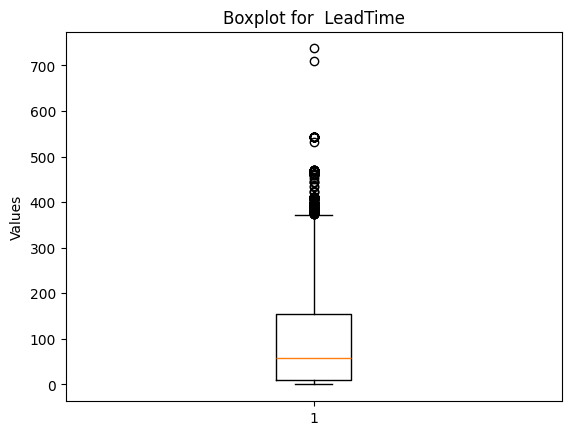

The num of unique values in  ArrivalDateYear is:  3


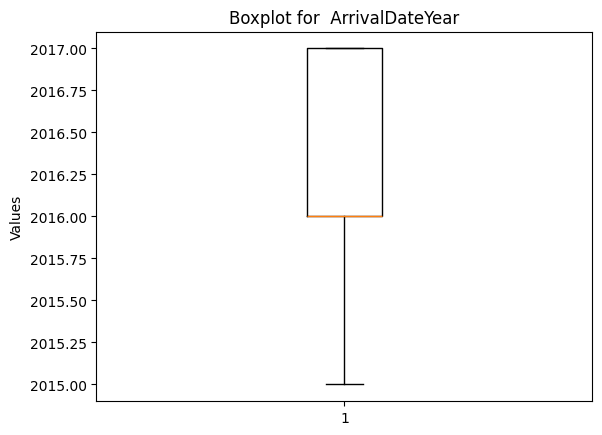

The num of unique values in  ArrivalDateWeekNumber is:  53


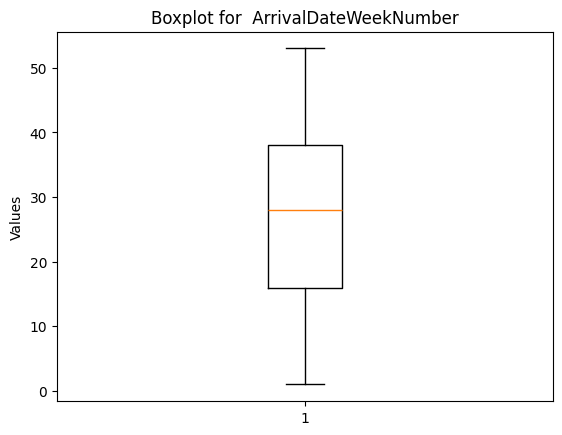

The num of unique values in  ArrivalDateDayOfMonth is:  31


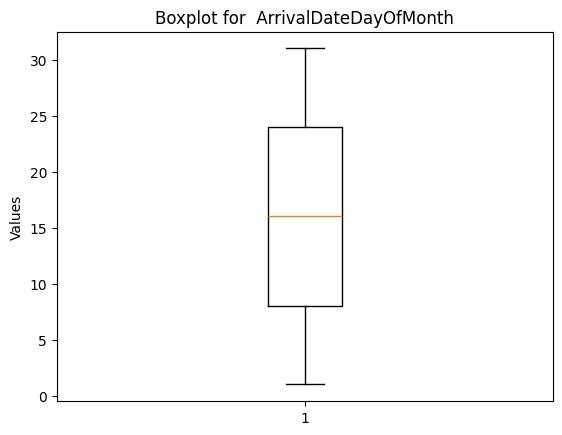

The num of unique values in  StaysInWeekendNights is:  17


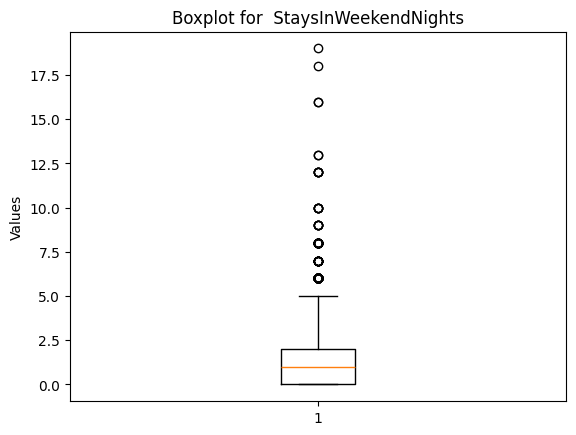

The num of unique values in  StaysInWeekNights is:  33


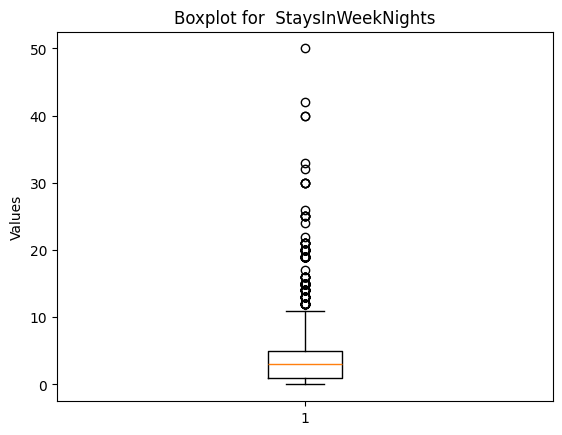

The num of unique values in  Adults is:  13


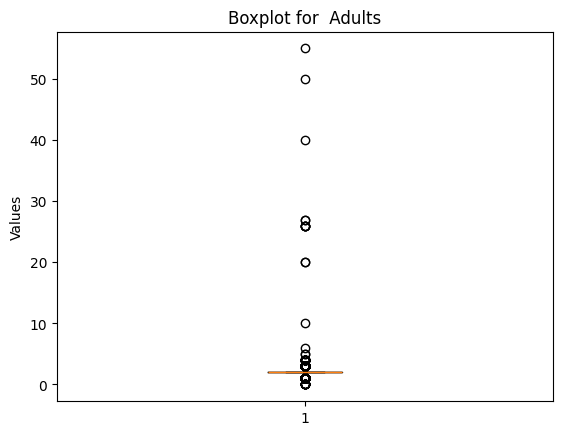

The num of unique values in  Children is:  5


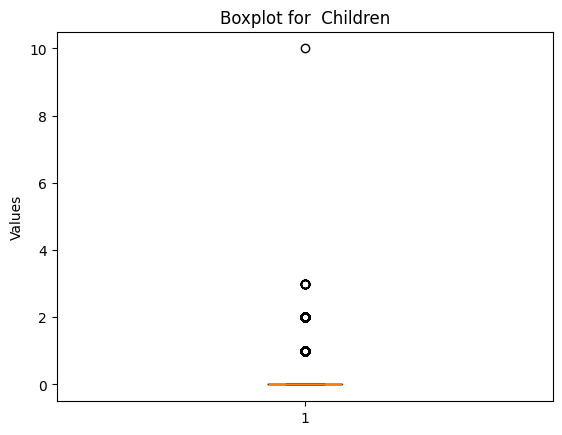

The num of unique values in  Babies is:  5


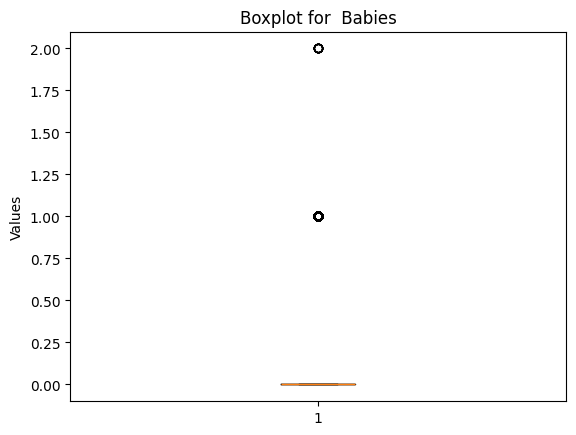

The num of unique values in  IsRepeatedGuest is:  2
The num of unique values in  PreviousCancellations is:  15


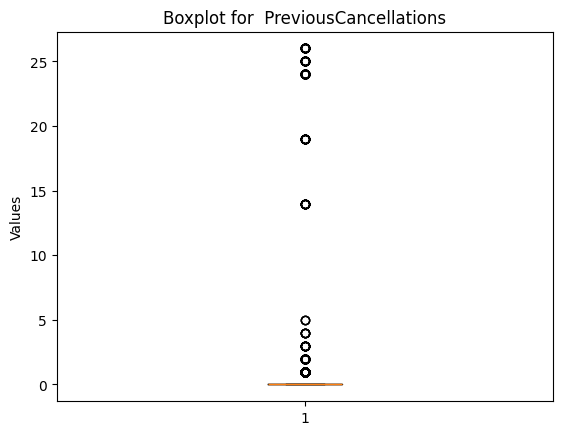

The num of unique values in  PreviousBookingsNotCanceled is:  73


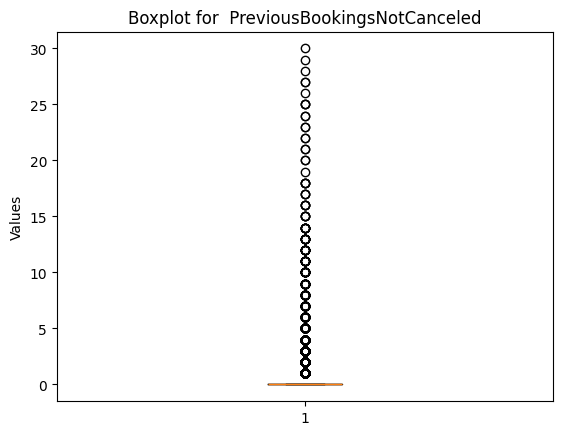

The num of unique values in  BookingChanges is:  19


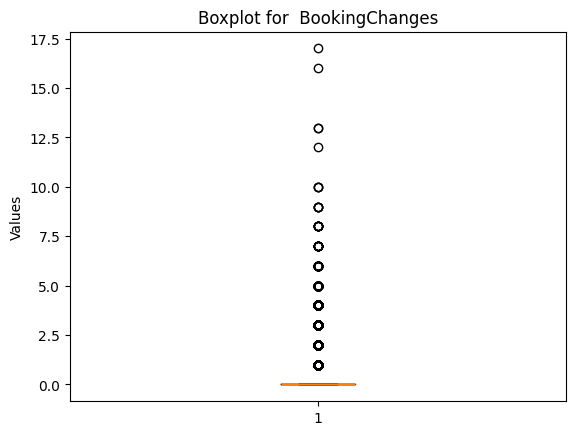

The num of unique values in  DaysInWaitingList is:  127


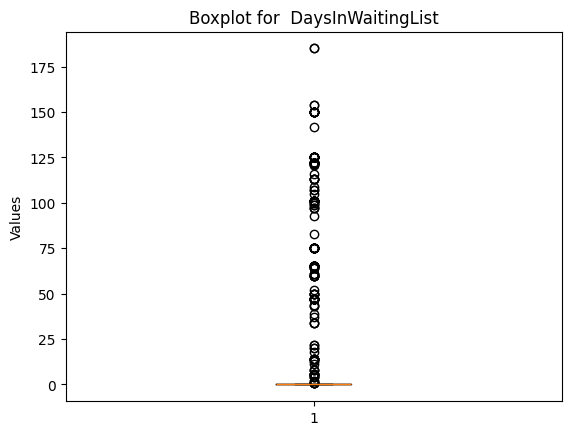

The num of unique values in  ADR is:  8859


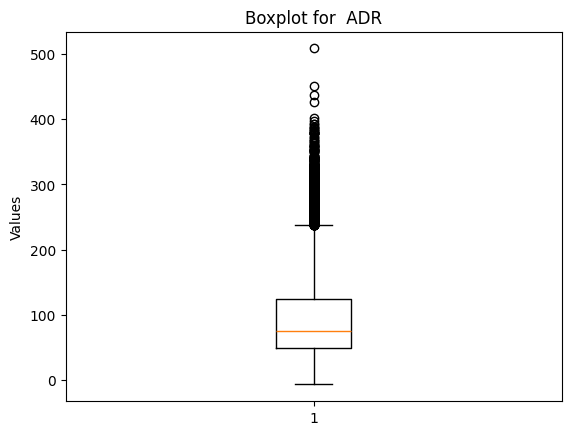

The num of unique values in  RequiredCarParkingSpaces is:  5


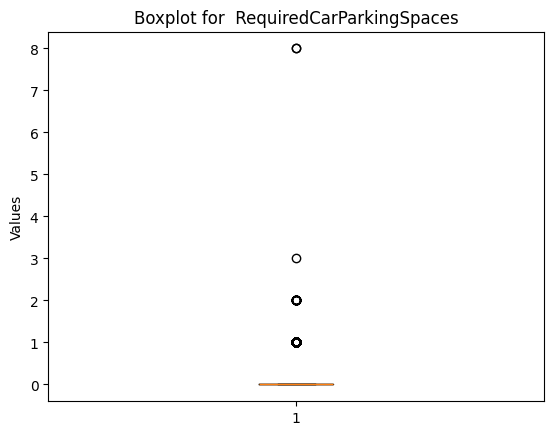

The num of unique values in  TotalOfSpecialRequests is:  6


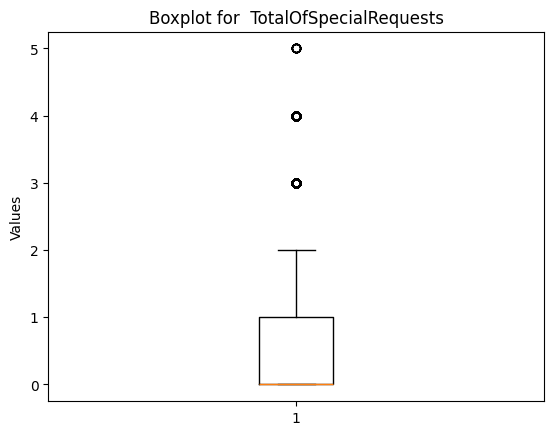

In [89]:
#plot boxplot for numeric columns using IQR method to see the outliers
for column in numeric_columns:
    print("The num of unique values in ",column,"is: ",hotel_booking[column].nunique())
    if hotel_booking[column].nunique() != 2:
        plt.boxplot(hotel_booking_1[column])
        plt.title(f'Boxplot for  {column}')
        plt.ylabel('Values')
        plt.show()


# Outlier Handling

### Handling 'Babies' column 

The column 'Babies' have invalid values like 10, 9.. Those rows has to be dropped

In [90]:
hotel_booking['Babies'].dtype

dtype('int64')

In [91]:
hotel_booking['Babies'].unique()

array([ 0,  1,  2, 10,  9])

In [92]:
invalid_baby_condition = ((hotel_booking['Babies'] == 10)  | (hotel_booking['Babies'] == 9))

In [93]:
hotel_booking[invalid_baby_condition].Adults.value_counts()


Adults
2    1
1    1
Name: count, dtype: int64

It cannot be valid as the number of adults accompanying 9 or 10 babies can't be 1 or 2. so let's drop those rows

In [94]:
hotel_booking = hotel_booking[~invalid_baby_condition]


In [95]:
hotel_booking.shape

(87009, 30)

### Handling Children 

In [96]:
hotel_booking['Children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [97]:
hotel_booking['Children'].dtype

dtype('float64')

In [98]:
#convert the float datatype to int
hotel_booking['Children'] = hotel_booking['Children'].astype(int)

In [99]:
hotel_booking['Children'].dtype

dtype('int64')

In [100]:
hotel_booking['Children'].unique()

array([ 0,  1,  2, 10,  3])

In [101]:
invalid_children_condition = (hotel_booking['Children'] == 10)

In [102]:
hotel_booking[invalid_children_condition].Adults.value_counts()

Adults
2    1
Name: count, dtype: int64

It cannot be valid as the number of adults accompanying 10 children can't be 2. so let's drop those rows

In [103]:
hotel_booking = hotel_booking[~invalid_children_condition]

In [104]:
hotel_booking.shape

(87008, 30)

### Handling ADR column 

In [105]:
hotel_booking['ADR'].describe()

count    87008.000000
mean       106.582531
std         54.915539
min         -6.380000
25%         72.250000
50%         98.330000
75%        134.100000
max       5400.000000
Name: ADR, dtype: float64

In [106]:
adr_median =  hotel_booking['ADR'].median()
adr_median

98.33

The 'ADR' column has a minimum value of -6.38, which doesn't make sense in this context as the average daily rate should not be negative. The maximum value is 5400, which is quite high compared to the mean (102.008) and median (95.0), suggesting it's an outlier.

In [107]:
# Replace the minimum and maximum values in 'ADR' column with the median

adr_min = hotel_booking['ADR'].min()
adr_max = hotel_booking['ADR'].max()
print(hotel_booking[hotel_booking['ADR'] < 0].count())

hotel_booking.loc[hotel_booking['ADR'] == adr_min, 'ADR'] = adr_median
hotel_booking.loc[hotel_booking['ADR'] == adr_max, 'ADR'] = adr_median

hotel_booking['ADR'].describe(include='all')

IsCanceled                     1
LeadTime                       1
ArrivalDateYear                1
ArrivalDateMonth               1
ArrivalDateWeekNumber          1
ArrivalDateDayOfMonth          1
StaysInWeekendNights           1
StaysInWeekNights              1
Adults                         1
Children                       1
Babies                         1
Meal                           1
Country                        1
MarketSegment                  1
DistributionChannel            1
IsRepeatedGuest                1
PreviousCancellations          1
PreviousBookingsNotCanceled    1
ReservedRoomType               1
AssignedRoomType               1
BookingChanges                 1
DepositType                    1
Agent                          1
DaysInWaitingList              1
CustomerType                   1
ADR                            1
RequiredCarParkingSpaces       1
TotalOfSpecialRequests         1
ReservationStatus              1
ReservationStatusDate          1
dtype: int

count    87008.000000
mean       106.522801
std         51.899149
min          0.000000
25%         72.250000
50%         98.330000
75%        134.100000
max        510.000000
Name: ADR, dtype: float64

Data Distribution - Continuous Features

In [108]:
numeric_columns.columns

Index(['LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests'],
      dtype='object')

# Data Distribution - Label

### IsCanceled - Data Distribution

In [109]:
hotel_booking['IsCanceled'].value_counts()

IsCanceled
0    63081
1    23927
Name: count, dtype: int64

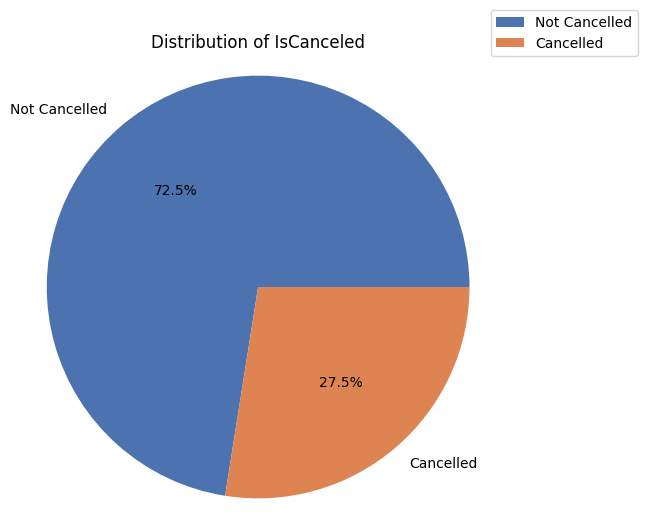

In [110]:

# Get the value counts for each category in 'IsCanceled'
is_canceled_counts = hotel_booking['IsCanceled'].value_counts()

label_value = {
                0 : 'Not Cancelled',
                1 : 'Cancelled'
                }
hotel_booking['mapping_iscanceled'] = hotel_booking['IsCanceled'].map(label_value)

# Create a pie chart using plt.pie()
plt.figure(figsize=(6,6))
plt.pie(is_canceled_counts, labels= hotel_booking['mapping_iscanceled'].unique(), colors=sns.color_palette('deep'), autopct='%1.1f%%')

# Add a legend
plt.legend(hotel_booking['mapping_iscanceled'].unique(), loc=(1, 1))

plt.title('Distribution of IsCanceled')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.show()
hotel_booking.drop(columns=['mapping_iscanceled'],inplace= True)

# Data Distribution - Features

In [111]:
# Function to calculate skewness of the distribution

def toFindSkewness(column):
    skewness = skew(hotel_booking[column])
    message = "The skewness value is {}".format(skewness)
    return message

# Handle Minorities

In [112]:
# Handle Minorities

def handle_categorical_minorities(pd_series, minority_threshold, replace_value='mode'):
    
    df = pd.DataFrame(pd_series)    
    column = df.columns.tolist()[0]
    value_count = df[column].value_counts()
    minorities = value_count[value_count<minority_threshold].index.tolist()
    df["is_minority"] = df[column].map(lambda x: x in minorities)
    
    
    replace_value = df[column].mode().item() if replace_value=='mode' else replace_value
    
    
    df[column][df.is_minority] = replace_value
    
    # drop "is_minority" column
    df.drop(columns=['is_minority'], inplace=True)
    
    return df[column]


### LeadTime - Data Distribution

Before handling outliers - subplot


/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


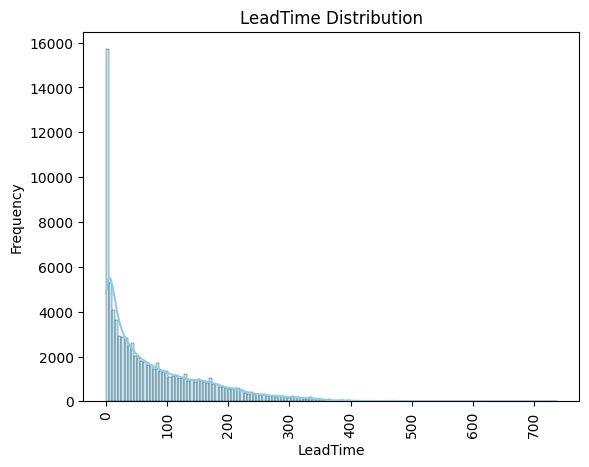

'The skewness value is 1.4339848049381645'

In [113]:
# Plot the distribution diagram using seaborn
sns.histplot(data=hotel_booking, x='LeadTime', kde=True, color='skyblue')

# Add labels and title
plt.xlabel('LeadTime')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('LeadTime Distribution')

# Show the plot
plt.show()
toFindSkewness('LeadTime')

### Data Distribution - ADR

In [114]:
hotel_booking['ADR'].value_counts()

ADR
0.00      1637
75.00     1319
65.00     1260
48.00      878
85.00      858
          ... 
307.67       1
426.25       1
199.12       1
204.74       1
157.71       1
Name: count, Length: 8856, dtype: int64

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


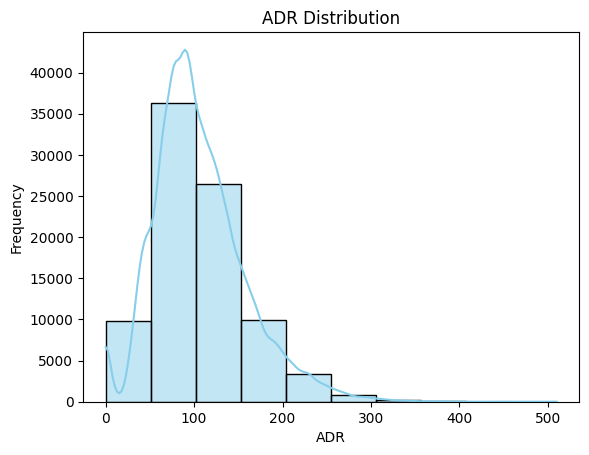

The skewness value is 0.8760783574728866


In [115]:
# Plot the distribution diagram using seaborn
sns.histplot(data=hotel_booking, x='ADR',bins=10, kde=True, color='skyblue')

# Add labels and title
plt.xlabel('ADR')
plt.ylabel('Frequency')
plt.title('ADR Distribution')

# Show the plot
plt.show()

# Calculate skewness
print(toFindSkewness('ADR'))

### Data Distribution -ArrivalDateYear

In [116]:
hotel_booking['ArrivalDateYear'].value_counts()

ArrivalDateYear
2016    42167
2017    31574
2015    13267
Name: count, dtype: int64

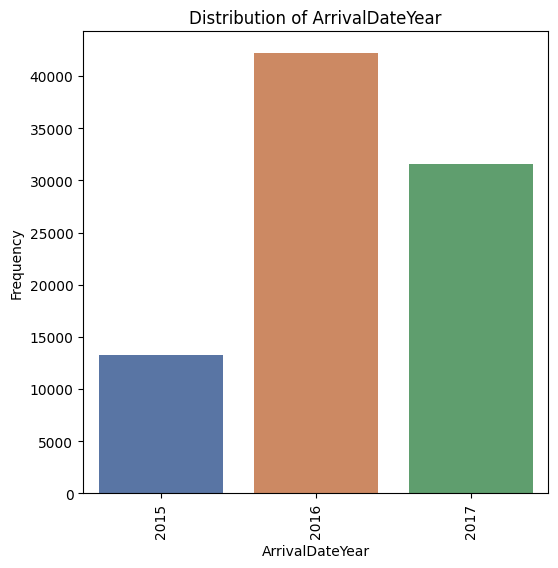

In [117]:


# Create a bar plot using seaborn
plt.figure(figsize=(6, 6))  
sns.countplot(data=hotel_booking, x='ArrivalDateYear', palette='deep')

# Add labels and title
plt.xlabel('ArrivalDateYear')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('Distribution of ArrivalDateYear')

# Show the plot
plt.show()

2016 year has most number of booking arrivals followed by 2017, 2015

### Data Distribution - ArrivalDateWeekNumber

In [118]:
hotel_booking['ArrivalDateWeekNumber'].value_counts()

ArrivalDateWeekNumber
33    2781
34    2478
32    2441
28    2330
30    2322
31    2275
29    2193
27    2159
35    2093
18    2084
21    2034
15    1978
17    1874
23    1865
20    1837
13    1810
19    1808
25    1781
22    1751
24    1743
26    1735
16    1733
14    1686
41    1657
11    1652
38    1632
36    1623
10    1622
7     1619
43    1601
39    1583
9     1565
12    1562
44    1543
8     1518
37    1466
42    1436
40    1426
53    1413
45    1311
6     1294
47    1281
48    1189
49    1162
46    1136
4     1121
5     1098
52    1046
50    1043
3     1041
2      938
1      856
51     783
Name: count, dtype: int64

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


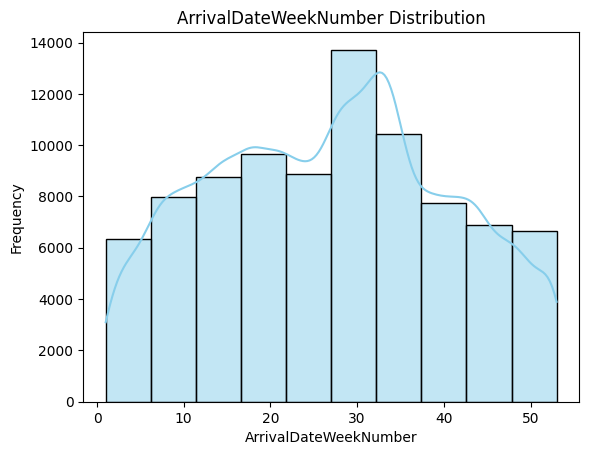

The skewness value is 0.022465225842461137


In [119]:
# Plot the distribution diagram using seaborn
sns.histplot(data=hotel_booking, x='ArrivalDateWeekNumber',bins=10, kde=True, color='skyblue')

# Add labels and title
plt.xlabel('ArrivalDateWeekNumber')
plt.ylabel('Frequency')
plt.title('ArrivalDateWeekNumber Distribution')

# Show the plot
plt.show()


# Calculate skewness
print(toFindSkewness('ArrivalDateWeekNumber'))


This is more of a uniform distribution

### Data Distribution - ArrivalDateDayOfMonth

In [120]:
hotel_booking['ArrivalDateDayOfMonth'].value_counts()

ArrivalDateDayOfMonth
17    3010
2     3009
26    2987
5     2968
16    2944
19    2939
28    2921
18    2915
12    2914
20    2903
11    2899
27    2882
29    2872
9     2863
15    2854
25    2826
3     2824
21    2803
13    2803
8     2800
6     2792
4     2784
10    2778
23    2763
1     2762
30    2757
24    2748
7     2685
14    2682
22    2595
31    1726
Name: count, dtype: int64

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


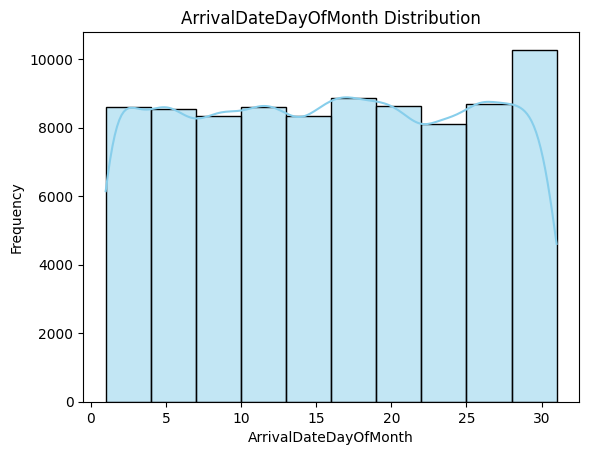

The skewness value is 0.0005521595403756502


In [121]:
# Plot the distribution diagram using seaborn
sns.histplot(data=hotel_booking, x='ArrivalDateDayOfMonth',bins=10, kde=True, color='skyblue')

# Add labels and title
plt.xlabel('ArrivalDateDayOfMonth')
plt.ylabel('Frequency')
plt.title('ArrivalDateDayOfMonth Distribution')

# Show the plot
plt.show()

# Calculate skewness
print(toFindSkewness('ArrivalDateDayOfMonth'))

ArrivalDateDayOfMonth data distribution is also a uniform distribution

# StaysInWeekNights - Data Distribution

In [122]:
hotel_booking['StaysInWeekNights'].value_counts()

StaysInWeekNights
1     22124
2     20671
3     16181
5      9640
4      7831
0      6106
6      1372
10      964
7       962
8       611
9       214
15       68
11       49
12       40
20       39
13       27
14       25
19       20
21       15
16       12
22        7
25        6
18        6
30        4
17        4
24        2
40        2
33        1
42        1
50        1
32        1
26        1
34        1
Name: count, dtype: int64

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


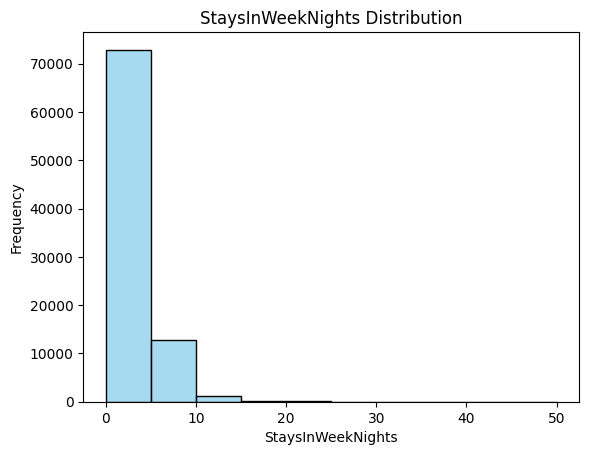

The skewness value is 2.576150252683237


In [123]:
# Plot the distribution diagram using seaborn
sns.histplot(data=hotel_booking, x='StaysInWeekNights',bins=10,  color='skyblue')

# Add labels and title
plt.xlabel('StaysInWeekNights')
plt.ylabel('Frequency')
plt.title('StaysInWeekNights Distribution')

# Show the plot
plt.show()

# Calculate skewness
print(toFindSkewness('StaysInWeekNights'))

This is a positively skewed distribution

# StaysInWeekendNights - Data Distribution

In [124]:
hotel_booking['StaysInWeekendNights'].value_counts()

StaysInWeekendNights
0     34970
2     26295
1     22596
4      1724
3      1142
6       112
5        68
8        58
7        15
9         9
10        7
12        5
13        2
16        2
18        1
19        1
14        1
Name: count, dtype: int64

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


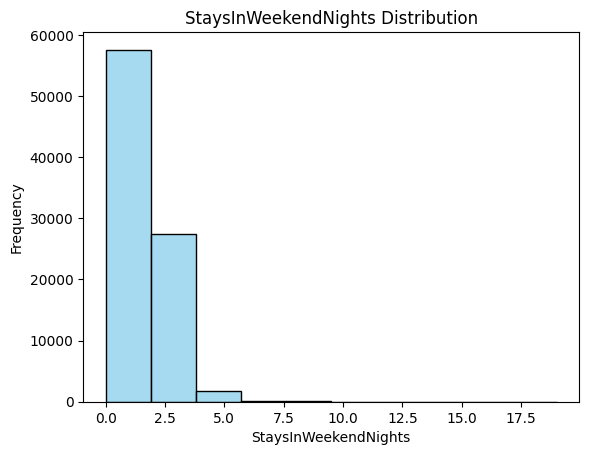

The skewness value is 1.3422096276850666


In [125]:
# Plot the distribution diagram using seaborn
sns.histplot(data=hotel_booking, x='StaysInWeekendNights',bins=10,  color='skyblue')

# Add labels and title
plt.xlabel('StaysInWeekendNights')
plt.ylabel('Frequency')
plt.title('StaysInWeekendNights Distribution')

# Show the plot
plt.show()

# Calculate skewness
print(toFindSkewness('StaysInWeekendNights'))

This is a positively skewed distribution

### Data Distribution - Adults

In [126]:
hotel_booking['Adults'].value_counts()

Adults
2     64495
1     16502
3      5935
4        60
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: count, dtype: int64

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


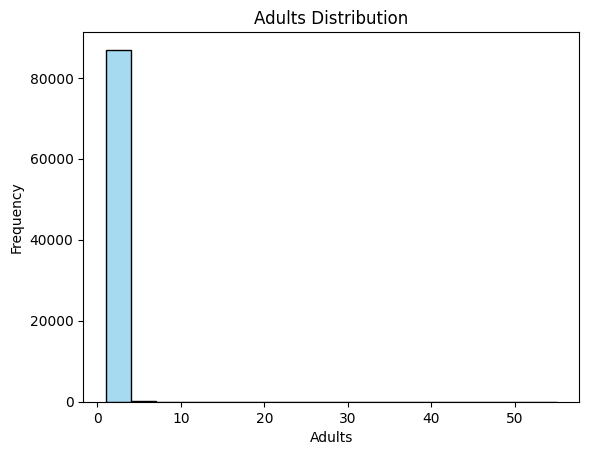

The skewness value is 21.141046098553012


In [127]:


# Plot the distribution diagram using seaborn
sns.histplot(data=hotel_booking, x='Adults',  color='skyblue')

# Add labels and title
plt.xlabel('Adults')
plt.ylabel('Frequency')
plt.title('Adults Distribution')

# Show the plot
plt.show()

# Calculate skewness
print(toFindSkewness('Adults'))



### Children - Data Distribution

In [128]:
hotel_booking['Children'].value_counts()

Children
0    78864
1     4691
2     3389
3       64
Name: count, dtype: int64

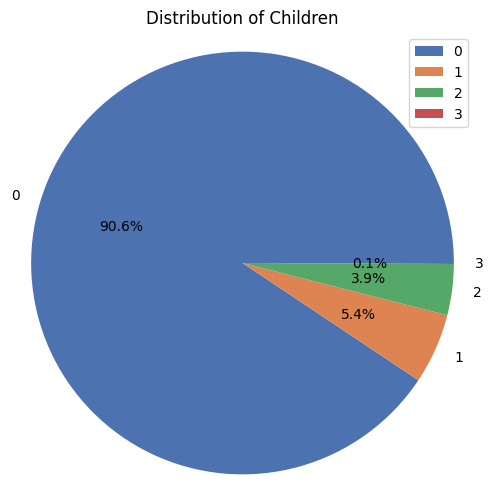

In [129]:


# Get the value counts for each category in 'Children'
children_counts = hotel_booking['Children'].value_counts()


# Create a pie chart using plt.pie()
plt.figure(figsize=(6, 6))
plt.pie(children_counts, labels=children_counts.index, colors=sns.color_palette('deep'), autopct='%1.1f%%')

# Add a legend
plt.legend(hotel_booking['Children'].unique(), loc='upper right')

plt.title('Distribution of Children')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.show()



### Data Distribution - Babies

In [130]:
hotel_booking['Babies'].value_counts()

Babies
0    86099
1      894
2       15
Name: count, dtype: int64

In [131]:

# Define the condition and the values to assign
condition = hotel_booking['Babies'] > 0
new_values = np.where(condition, 'Yes', 'No')

# Create the new column
hotel_booking['Babies_visualization'] = new_values

hotel_booking.head()


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,Babies_visualization
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,9,0,Transient,0.0,0,0,Check-Out,2015-07-01,No
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,9,0,Transient,0.0,0,0,Check-Out,2015-07-01,No
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,9,0,Transient,75.0,0,0,Check-Out,2015-07-02,No
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,0,Transient,75.0,0,0,Check-Out,2015-07-02,No
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03,No


In [132]:
# Get the value counts for each category in 'Babies_visualization'
babies_counts = hotel_booking['Babies_visualization'].value_counts()
babies_counts

Babies_visualization
No     86099
Yes      909
Name: count, dtype: int64

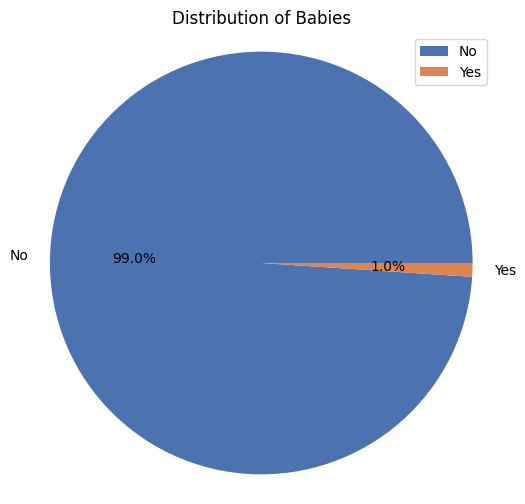

In [133]:


# Create a pie chart using plt.pie()
plt.figure(figsize=(6, 6))
plt.pie(babies_counts, labels=babies_counts.index, colors=sns.color_palette('deep'), autopct='%1.1f%%')

# Add a legend
plt.legend(hotel_booking['Babies_visualization'].unique(), loc='upper right')

plt.title('Distribution of Babies')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.show()

hotel_booking.drop(columns=['Babies_visualization'],inplace= True)

### Data Distribution - IsRepeatedGuest

In [134]:
hotel_booking['IsRepeatedGuest'].value_counts()

IsRepeatedGuest
0    83645
1     3363
Name: count, dtype: int64

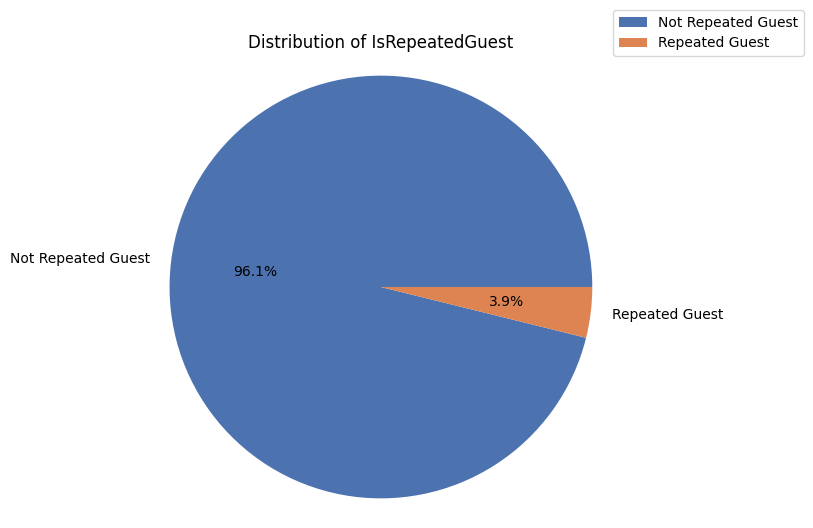

In [135]:



# Get the value counts for each category in 'IsRepeatedGuest'
is_repeated_counts = hotel_booking['IsRepeatedGuest'].value_counts()

label_value = {
                0 : 'Not Repeated Guest',
                1 : 'Repeated Guest'
                }
hotel_booking['mapping_isrepeatedguest'] = hotel_booking['IsRepeatedGuest'].map(label_value)

# Create a pie chart using plt.pie()
plt.figure(figsize=(6, 6))
plt.pie(is_repeated_counts, labels=hotel_booking['mapping_isrepeatedguest'].unique(), colors=sns.color_palette('deep'), autopct='%1.1f%%')

# Add a legend
plt.legend(hotel_booking['mapping_isrepeatedguest'].unique(), loc=(1, 1))

plt.title('Distribution of IsRepeatedGuest')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.show()

hotel_booking.drop(columns=['mapping_isrepeatedguest'],inplace= True)

### Data Distribution - PreviousCancellations and PreviousBookingsNotCanceled

In [136]:
hotel_booking['PreviousCancellations'].dtypes

dtype('int64')

In [137]:
hotel_booking['PreviousCancellations'].unique()

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11])

In [138]:
hotel_booking['PreviousCancellations'].value_counts()

PreviousCancellations
0     85329
1      1403
2       110
3        61
4        30
11       27
5        19
6        17
13        4
25        2
24        2
26        1
14        1
19        1
21        1
Name: count, dtype: int64

We create a new column named PreviousCancellations_Categorical because as we can see only 5% of data shows cancellation and rest are 'no cancellation'.

In [139]:
# Define the condition and the values to assign
condition = hotel_booking['PreviousCancellations'] > 0
new_values = np.where(condition, 'Yes', 'No')

# Create the new column
hotel_booking['PreviousCancellations_Categorical'] = new_values

hotel_booking.head()



,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,PreviousCancellations_Categorical
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,9,0,Transient,0.0,0,0,Check-Out,2015-07-01,No
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,9,0,Transient,0.0,0,0,Check-Out,2015-07-01,No
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,9,0,Transient,75.0,0,0,Check-Out,2015-07-02,No
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,0,Transient,75.0,0,0,Check-Out,2015-07-02,No
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03,No


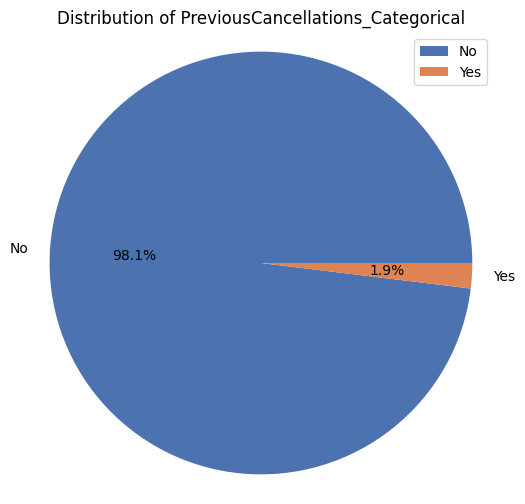

In [140]:

previous_cancellation_count = hotel_booking['PreviousCancellations_Categorical'].value_counts()
# Create a pie chart using plt.pie()
plt.figure(figsize=(6, 6))
plt.pie(previous_cancellation_count, labels=previous_cancellation_count.index, colors=sns.color_palette('deep'), autopct='%1.1f%%')

# Add a legend
plt.legend(hotel_booking['PreviousCancellations_Categorical'].unique(), loc='upper right')

plt.title('Distribution of PreviousCancellations_Categorical')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.show()

hotel_booking.drop(columns=['PreviousCancellations_Categorical'],inplace= True)

In [141]:
hotel_booking.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,BookingChanges,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,3,No Deposit,9,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,4,No Deposit,9,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,0,No Deposit,9,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,0,No Deposit,304,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Data Distribution - PreviousBookingsNotCanceled

In [142]:
hotel_booking['PreviousBookingsNotCanceled'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 19, 26, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

In [143]:
hotel_booking['PreviousBookingsNotCanceled'].value_counts()

PreviousBookingsNotCanceled
0     83471
1      1477
2       580
3       331
4       228
      ...  
47        1
49        1
50        1
51        1
72        1
Name: count, Length: 73, dtype: int64

In [144]:
# Define the condition and the values to assign
condition = hotel_booking['PreviousBookingsNotCanceled'] > 0
new_values = np.where(condition, 'Yes', 'No')

# Create the new column
hotel_booking['PreviousBookingsNotCanceled_Categorical'] = new_values

hotel_booking.head()



,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,PreviousBookingsNotCanceled_Categorical
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,9,0,Transient,0.0,0,0,Check-Out,2015-07-01,No
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,9,0,Transient,0.0,0,0,Check-Out,2015-07-01,No
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,9,0,Transient,75.0,0,0,Check-Out,2015-07-02,No
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,0,Transient,75.0,0,0,Check-Out,2015-07-02,No
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03,No


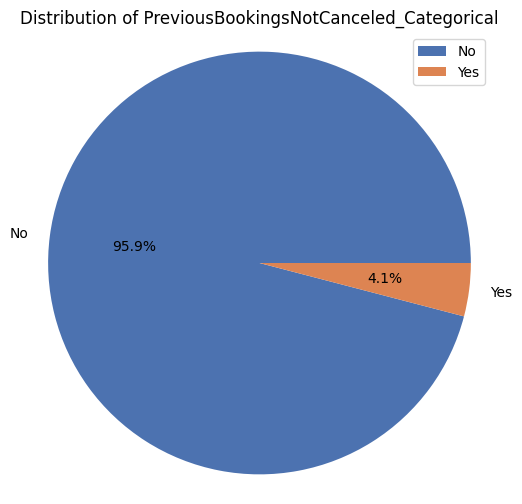

In [145]:

previous_cancellation_count = hotel_booking['PreviousBookingsNotCanceled_Categorical'].value_counts()
# Create a pie chart using plt.pie()
plt.figure(figsize=(6, 6))
plt.pie(previous_cancellation_count, labels=previous_cancellation_count.index, colors=sns.color_palette('deep'), autopct='%1.1f%%')

# Add a legend
plt.legend(hotel_booking['PreviousBookingsNotCanceled_Categorical'].unique(), loc='upper right')

plt.title('Distribution of PreviousBookingsNotCanceled_Categorical')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.show()

hotel_booking.drop(columns=['PreviousBookingsNotCanceled_Categorical'],inplace= True)

 Here, we can see the feature 'PreviousCancellations' denotes bookings that are cancelled and 'PreviousBookingsNotCanceled' denotes the bookings that are not cancelled. 

Since total no. of bookings is not given, we can take the ratio of these two feature values to see whether that person's booking is likely to cancel or not.
Eg: If a person books a total 100 bookings, out of it, 95 are cancelled and 5 is not cancelled is not as same as the person who cancelled 2 out of his 7 bookings. so we will be adding one more column that depicts the ratio of these two.

In [146]:
hotel_booking['PreviousCancellations'].isna().sum()

0

In [147]:
hotel_booking['PreviousBookingsNotCanceled'].isna().sum()

0

In [148]:
hotel_booking['total_bookings'] = hotel_booking['PreviousCancellations'] + hotel_booking['PreviousBookingsNotCanceled']


In [149]:
hotel_booking['total_bookings'].unique()

array([ 0,  1,  2,  4,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 26, 19, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78])

In [150]:
hotel_booking['total_bookings'].value_counts()

total_bookings
0     82417
1      2426
2       603
3       330
4       234
      ...  
50        1
51        1
54        1
55        1
78        1
Name: count, Length: 77, dtype: int64

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


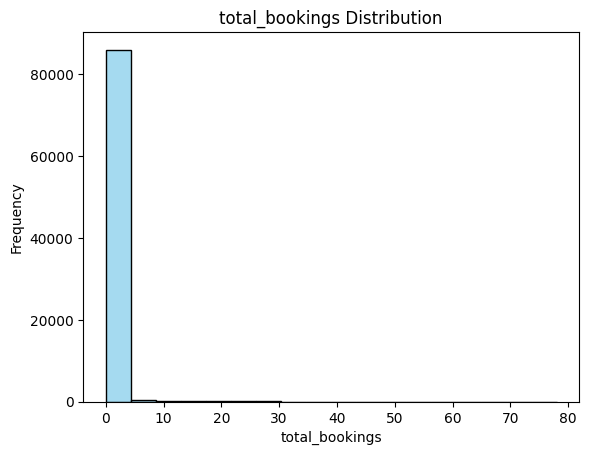

The skewness value is 20.043280571221512


In [151]:


# Plot the distribution diagram using seaborn
sns.histplot(data=hotel_booking, x='total_bookings',  color='skyblue')

# Add labels and title
plt.xlabel('total_bookings')
plt.ylabel('Frequency')
plt.title('total_bookings Distribution')

# Show the plot
plt.show()

# Calculate skewness
print(toFindSkewness('total_bookings'))


In [152]:
hotel_booking['cancellation_ratio'] = hotel_booking['PreviousCancellations']/hotel_booking['total_bookings']
hotel_booking['cancellation_ratio'].unique()

array([       nan, 0.        , 0.25      , 0.5       , 0.33333333,
       0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111,
       0.1       , 0.09090909, 0.08333333, 0.07692308, 0.4       ,
       0.28571429, 0.22222222, 0.18181818, 0.15384615, 0.13333333,
       1.        , 0.03571429, 0.03448276, 0.03333333, 0.03225806,
       0.6       , 0.07142857, 0.23076923, 0.26666667, 0.23529412,
       0.66666667, 0.06666667, 0.0625    , 0.05882353, 0.05555556,
       0.05263158, 0.05      , 0.04761905, 0.04545455, 0.04347826,
       0.04166667, 0.04      , 0.03846154, 0.03703704, 0.625     ,
       0.55555556, 0.11764706, 0.10526316, 0.0952381 , 0.08695652,
       0.08      , 0.06896552, 0.09677419, 0.09375   , 0.08823529,
       0.08571429, 0.08108108, 0.07894737, 0.075     , 0.07317073,
       0.06976744, 0.06818182, 0.06521739, 0.06382979, 0.08163265,
       0.07843137, 0.09433962, 0.09259259, 0.08928571, 0.0877193 ,
       0.0862069 , 0.08474576, 0.08196721, 0.08064516, 0.09230

There are some nan values which is to be handled. we are gonna impute them with mean value as the cancellation ratio ranges from 0 to 1

In [153]:
hotel_booking['cancellation_ratio'].describe()

count    4591.000000
mean        0.260616
std         0.415973
min         0.000000
25%         0.000000
50%         0.000000
75%         0.500000
max         1.000000
Name: cancellation_ratio, dtype: float64

In [154]:
hotel_booking['cancellation_ratio'].median()

0.0

In [155]:
cancel_ratio_mean = hotel_booking['cancellation_ratio'].mean()
cancel_ratio_mean

0.26061606389820485

In [156]:
hotel_booking['cancellation_ratio'].isna().sum()

82417

There are about 109539 null values for cancellation_ratio

In [157]:
#Fill the null values of cancellation_ratio with its mean. i.e, '0.633818'
hotel_booking['cancellation_ratio'] = hotel_booking['cancellation_ratio'].fillna(cancel_ratio_mean)


In [158]:
hotel_booking['cancellation_ratio'].unique()

array([0.26061606, 0.        , 0.25      , 0.5       , 0.33333333,
       0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111,
       0.1       , 0.09090909, 0.08333333, 0.07692308, 0.4       ,
       0.28571429, 0.22222222, 0.18181818, 0.15384615, 0.13333333,
       1.        , 0.03571429, 0.03448276, 0.03333333, 0.03225806,
       0.6       , 0.07142857, 0.23076923, 0.26666667, 0.23529412,
       0.66666667, 0.06666667, 0.0625    , 0.05882353, 0.05555556,
       0.05263158, 0.05      , 0.04761905, 0.04545455, 0.04347826,
       0.04166667, 0.04      , 0.03846154, 0.03703704, 0.625     ,
       0.55555556, 0.11764706, 0.10526316, 0.0952381 , 0.08695652,
       0.08      , 0.06896552, 0.09677419, 0.09375   , 0.08823529,
       0.08571429, 0.08108108, 0.07894737, 0.075     , 0.07317073,
       0.06976744, 0.06818182, 0.06521739, 0.06382979, 0.08163265,
       0.07843137, 0.09433962, 0.09259259, 0.08928571, 0.0877193 ,
       0.0862069 , 0.08474576, 0.08196721, 0.08064516, 0.09230

In [159]:
hotel_booking['cancellation_ratio'].isna().sum()

0

### BookingChanges - Data Distribution

In [160]:
hotel_booking['BookingChanges'].value_counts()

BookingChanges
0     71262
1     10822
2      3476
3       858
4       347
5       112
6        57
7        28
8        14
9         8
10        6
13        5
14        3
15        3
17        2
16        2
12        1
18        1
11        1
Name: count, dtype: int64

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


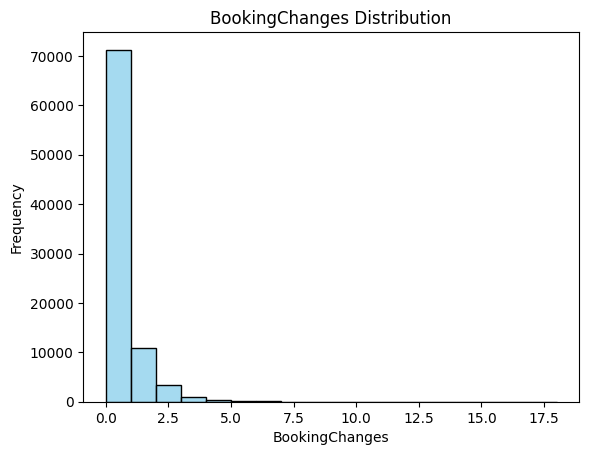

The skewness value is 5.073129788040711


In [161]:
# Plot the distribution diagram using seaborn
sns.histplot(data=hotel_booking, x='BookingChanges',bins = 'auto',  color='skyblue')

# Add labels and title
plt.xlabel('BookingChanges')
plt.ylabel('Frequency')
plt.title('BookingChanges Distribution')

# Show the plot
plt.show()

# Calculate skewness
print(toFindSkewness('BookingChanges'))

The distribution is positively skewed

### Data Distribution - DaysInWaitingList

In [162]:
hotel_booking['DaysInWaitingList'].value_counts()

DaysInWaitingList
0      86153
63        53
87        25
44        23
15        22
       ...  
109        1
116        1
142        1
52         1
36         1
Name: count, Length: 127, dtype: int64

In [163]:
handle_categorical_minorities(hotel_booking.DaysInWaitingList, minority_threshold=5000, replace_value='other')
hotel_booking.Country.value_counts()

/tmp/ipykernel_39775/3310362400.py:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[column][df.is_minority] = replace_value
/tmp/ipykernel_39775/3310362400.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

Country
PRT    27746
GBR    10411
FRA     8799
ESP     7232
DEU     5372
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: count, Length: 177, dtype: int64

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


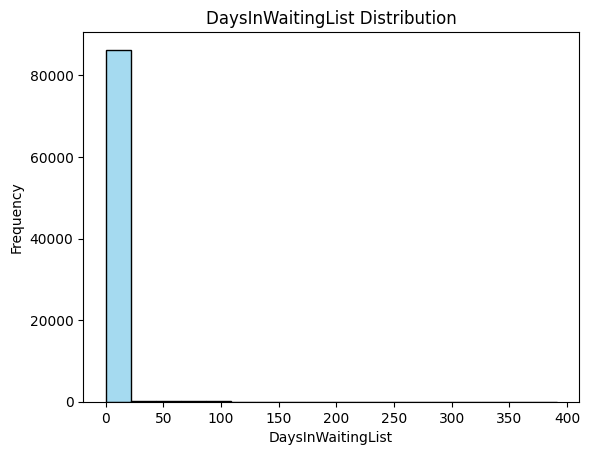

The skewness value is 19.441976659250304


In [164]:

# Plot the distribution diagram using seaborn
sns.histplot(data=hotel_booking, x='DaysInWaitingList',bins='auto', color='skyblue')

# Add labels and title
plt.xlabel('DaysInWaitingList')
plt.ylabel('Frequency')
plt.title('DaysInWaitingList Distribution')

# Show the plot
plt.show()

# Calculate skewness
print(toFindSkewness('DaysInWaitingList'))

# Data Distribution - RequiredCarParkingSpaces

In [165]:
hotel_booking['RequiredCarParkingSpaces'].value_counts()

RequiredCarParkingSpaces
0    79704
1     7271
2       28
3        3
8        2
Name: count, dtype: int64

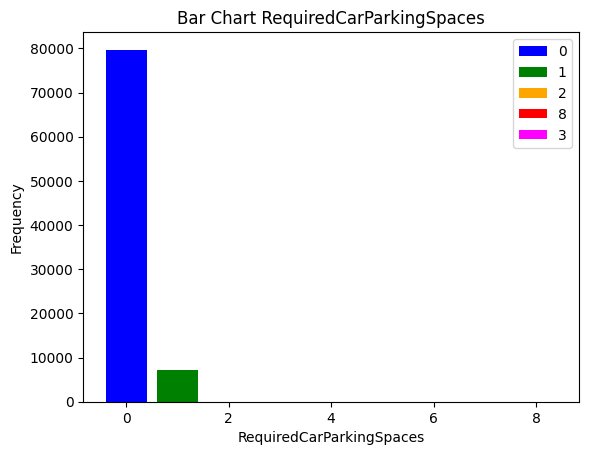

In [166]:


required_car_parking_count = hotel_booking['RequiredCarParkingSpaces'].value_counts()

# Create a bar chart
plt.bar(hotel_booking['RequiredCarParkingSpaces'].unique(), required_car_parking_count,color = ['blue', 'green', 'orange', 'red','magenta'],label = hotel_booking['RequiredCarParkingSpaces'].unique())

# Add a legend
plt.legend()
# Add labels and title
plt.xlabel('RequiredCarParkingSpaces')
plt.ylabel('Frequency')
plt.title('Bar Chart RequiredCarParkingSpaces')

# Display the chart
plt.show()

Car parking is not required by majority of customers and most no.of space required is 2.

### Data Distribution - TotalOfSpecialRequests

In [167]:
hotel_booking['TotalOfSpecialRequests'].value_counts()

TotalOfSpecialRequests
0    43721
1    28876
2    11757
3     2300
4      318
5       36
Name: count, dtype: int64

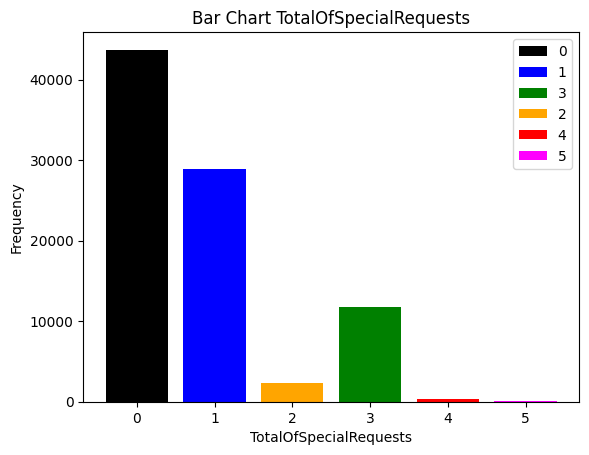

In [168]:



total_of_special_requests_count = hotel_booking['TotalOfSpecialRequests'].value_counts()

# Create a bar chart
plt.bar(hotel_booking['TotalOfSpecialRequests'].unique(), total_of_special_requests_count,color = ['black','blue', 'green', 'orange', 'red','magenta'],label =hotel_booking['TotalOfSpecialRequests'].unique() )

# Add a legend
plt.legend()
# Add labels and title
plt.xlabel('TotalOfSpecialRequests')
plt.ylabel('Frequency')
plt.title('Bar Chart TotalOfSpecialRequests')

# Display the chart
plt.show()

Most of the customer doesn't have any special orders. The next majority number of special request is 1 and then 3.

# Data Distribution - Categorical Features

## 1. ArrivalDateMonth

In [169]:
hotel_booking['ArrivalDateMonth'].value_counts()

ArrivalDateMonth
August       11210
July         10010
May           8329
April         7879
June          7745
March         7473
October       6904
September     6671
February      6065
December      5089
November      4967
January       4666
Name: count, dtype: int64

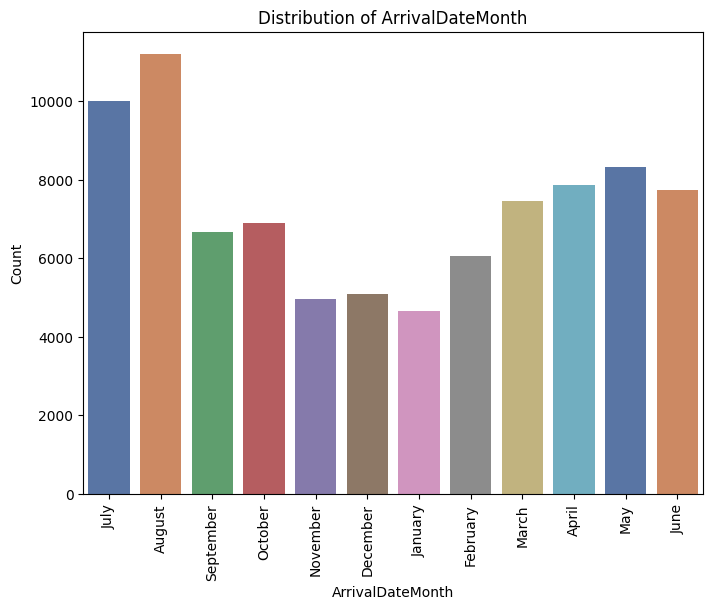

In [170]:
# Create a bar plot using seaborn
plt.figure(figsize=(8, 6))  
sns.countplot(data=hotel_booking, x='ArrivalDateMonth', palette='deep')

# Add labels and title
plt.xlabel('ArrivalDateMonth')
plt.ylabel('Count')
plt.title('Distribution of ArrivalDateMonth')
plt.xticks(rotation=90)
# Show the plot
plt.show()

##
Data Distribution - Meal

In [171]:
hotel_booking['Meal'].value_counts()

Meal
BB           67691
SC            9389
HB            9076
Undefined      492
FB             360
Name: count, dtype: int64

The 'undefined' or 'SC' value shows no meal.. Let's group them together as 'no meals' 

In [172]:
hotel_booking['Meal'].unique()

array(['BB       ', 'FB       ', 'HB       ', 'SC       ', 'Undefined'],
      dtype=object)

In [173]:
hotel_booking['Meal'] = hotel_booking['Meal'].str.strip()

In [174]:
hotel_booking['Meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [175]:
hotel_booking['Meal'] = hotel_booking['Meal'].replace('SC', 'no_meals')
hotel_booking['Meal'] = hotel_booking['Meal'].replace('Undefined', 'no_meals')

In [176]:
hotel_booking['Meal'].value_counts()

Meal
BB          67691
no_meals     9881
HB           9076
FB            360
Name: count, dtype: int64

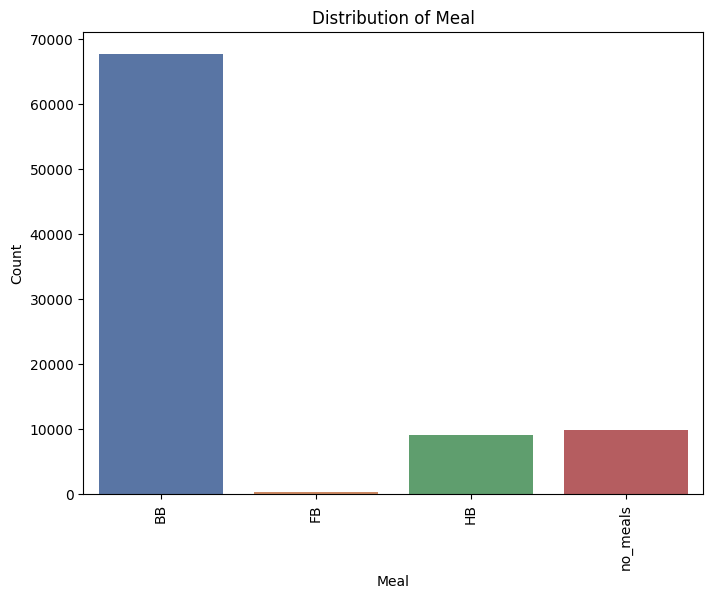

In [177]:
# Create a bar plot using seaborn
plt.figure(figsize=(8, 6))  
sns.countplot(data=hotel_booking, x='Meal', palette='deep')

# Add labels and title
plt.xlabel('Meal')
plt.ylabel('Count')
plt.title('Distribution of Meal')
plt.xticks(rotation=90)
# Show the plot
plt.show()

## Data Distribution - Country

In [178]:
hotel_booking['Country'].value_counts()

Country
PRT    27746
GBR    10411
FRA     8799
ESP     7232
DEU     5372
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: count, Length: 177, dtype: int64

In [179]:
# Flatten the lists in the 'Values' column
flattened_values = []
# flattened_values = [val for sublist in hotel_booking['Country'] for val in sublist]
for value in hotel_booking['Country']:
    if isinstance(value, list):
        for v in value:
            flattened_values.append(v)
    else:
        flattened_values.append(value)
# Count the occurrences of each unique value
value_counts = pd.Series(flattened_values).value_counts()



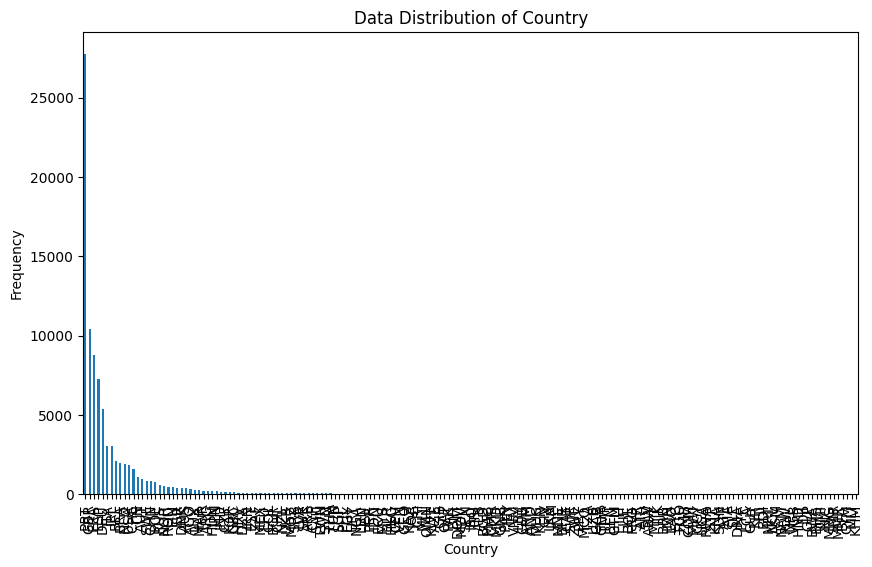

In [180]:

#Create a bar plot
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('Data Distribution of Country')
plt.xlabel('Country')
plt.ylabel('Frequency')
# plt.xticks(rotation=180)
plt.xticks(rotation='vertical')
plt.show()

We need to take first few countries as it is and rest of them as 'Others'

## MarketSegment

In [181]:
hotel_booking['MarketSegment'].value_counts()

MarketSegment
Online TA        51369
Offline TA/TO    13851
Direct           11751
Groups            4922
Corporate         4199
Complementary      688
Aviation           226
Undefined            2
Name: count, dtype: int64

In [182]:
market_segment_mode = hotel_booking['MarketSegment'].mode().item()

In [183]:
hotel_booking['MarketSegment'] = hotel_booking['MarketSegment'].replace('Undefined', market_segment_mode)

In [184]:
hotel_booking['MarketSegment'].value_counts()

MarketSegment
Online TA        51371
Offline TA/TO    13851
Direct           11751
Groups            4922
Corporate         4199
Complementary      688
Aviation           226
Name: count, dtype: int64

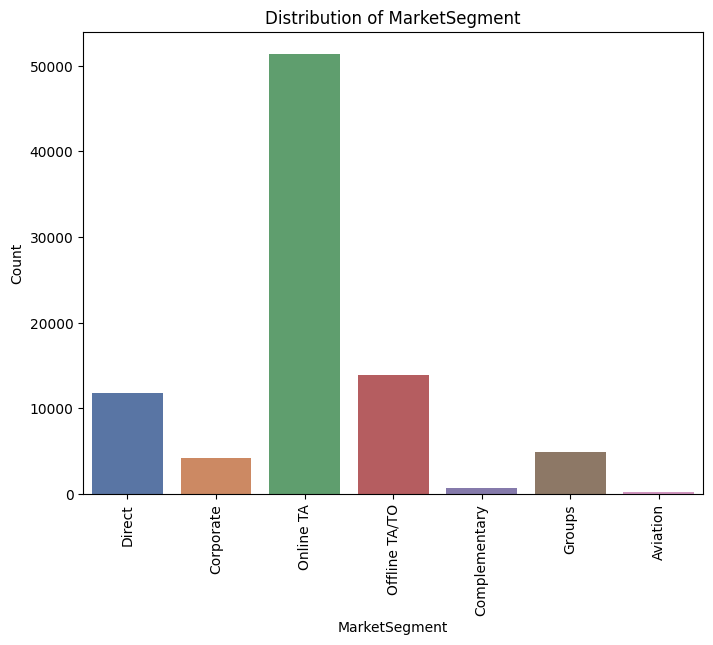

In [185]:
# Create a bar plot using seaborn
plt.figure(figsize=(8, 6))  
sns.countplot(data=hotel_booking, x='MarketSegment', palette='deep')

# Add labels and title
plt.xlabel('MarketSegment')
plt.ylabel('Count')
plt.title('Distribution of MarketSegment')
plt.xticks(rotation=90)
# Show the plot
plt.show()

Most of the bookings are happening through online travel agents and offline travel agents and tour operators

## DistributionChannel

In [186]:
hotel_booking['DistributionChannel'].value_counts()

DistributionChannel
TA/TO        68840
Direct       12921
Corporate     5061
GDS            181
Undefined        5
Name: count, dtype: int64

In [187]:
#Let's impute the rows with undefined value with the mode

distribution_channel_mode = hotel_booking['DistributionChannel'].mode().item()
distribution_channel_mode

'TA/TO'

In [188]:
hotel_booking['DistributionChannel'] = hotel_booking['DistributionChannel'].replace('Undefined', distribution_channel_mode)

In [189]:
hotel_booking['DistributionChannel'].value_counts()

DistributionChannel
TA/TO        68845
Direct       12921
Corporate     5061
GDS            181
Name: count, dtype: int64

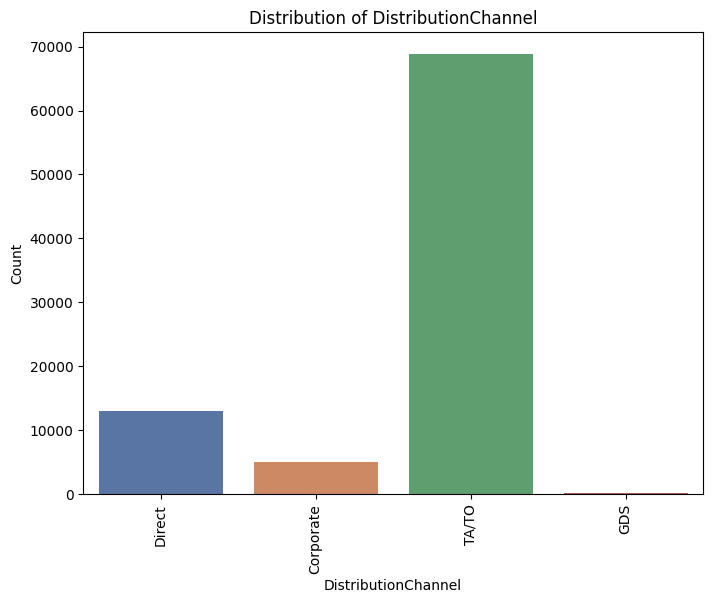

In [190]:
# Create a bar plot using seaborn
plt.figure(figsize=(8, 6))  
sns.countplot(data=hotel_booking, x='DistributionChannel', palette='deep')

# Add labels and title
plt.xlabel('DistributionChannel')
plt.ylabel('Count')
plt.title('Distribution of DistributionChannel')
plt.xticks(rotation=90)
# Show the plot
plt.show()

Travel Agents / Tour Operator are the most common distribution channel for booking

# ReservedRoomType

In [191]:
hotel_booking['ReservedRoomType'].value_counts()

ReservedRoomType
A                   56426
D                   17373
E                    6035
F                    2818
G                    2049
C                     914
B                     791
H                     596
L                       6
Name: count, dtype: int64

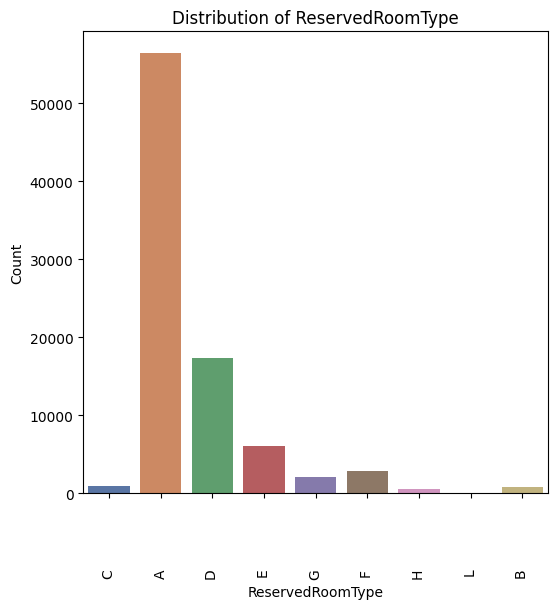

In [192]:
# Create a bar plot using seaborn
plt.figure(figsize=(6, 6))  
sns.countplot(data=hotel_booking, x='ReservedRoomType', palette='deep')

# Add labels and title
plt.xlabel('ReservedRoomType')
plt.ylabel('Count')
plt.title('Distribution of ReservedRoomType')
plt.xticks(rotation=90)
# Show the plot
plt.show()

The most common roomtype reserved is 'A'

## AssignedRoomType

In [193]:
hotel_booking['AssignedRoomType'].value_counts()

AssignedRoomType
A                   46247
D                   22414
E                    7190
F                    3627
G                    2494
C                    2160
B                    1631
H                     706
I                     353
K                     185
L                       1
Name: count, dtype: int64

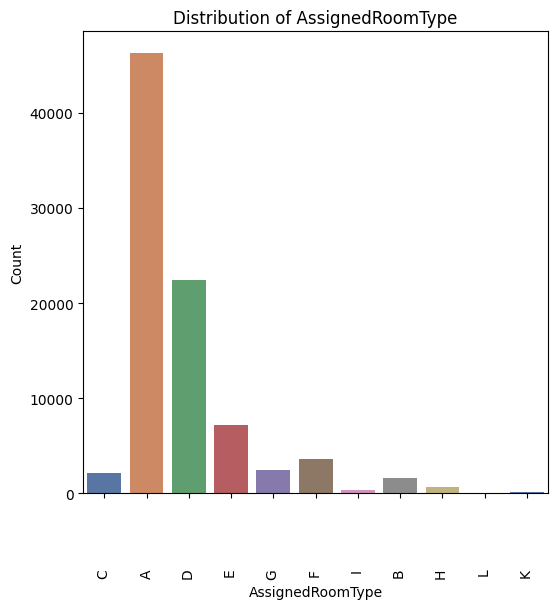

In [194]:
# Create a bar plot using seaborn
plt.figure(figsize=(6, 6))  
sns.countplot(data=hotel_booking, x='AssignedRoomType', palette='deep')

# Add labels and title
plt.xlabel('AssignedRoomType')
plt.ylabel('Count')
plt.title('Distribution of AssignedRoomType')
plt.xticks(rotation=90)
# Show the plot
plt.show()

Most assigned room type is A  followed by D

# DepositType

In [195]:
hotel_booking['DepositType'].value_counts()

DepositType
No Deposit         85863
Non Refund          1038
Refundable           107
Name: count, dtype: int64

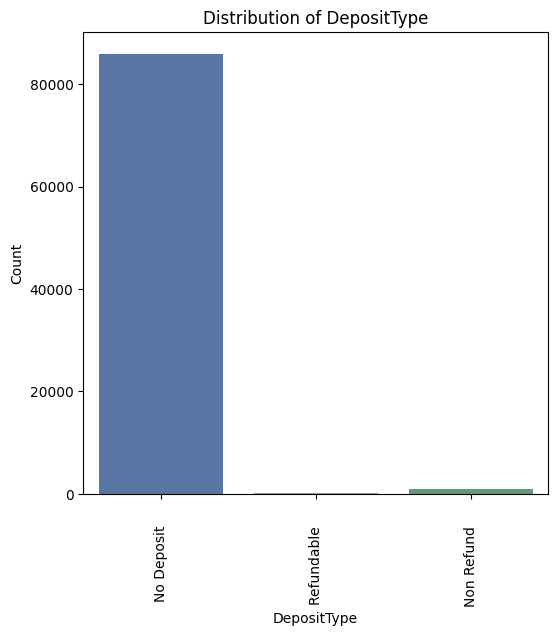

In [196]:
# Create a bar plot using seaborn
plt.figure(figsize=(6, 6))  
sns.countplot(data=hotel_booking, x='DepositType', palette='deep')

# Add labels and title
plt.xlabel('DepositType')
plt.ylabel('Count')
plt.title('Distribution of DepositType')
plt.xticks(rotation=90)
# Show the plot
plt.show()

Most of the bookings are with no deposit. non-refundable bookings are more when compared to refundable bookings

# Agent


In [197]:
hotel_booking['Agent'].value_counts()

Agent
9      40669
240    13028
14      3326
7       3290
250     2779
       ...  
59         1
451        1
472        1
70         1
449        1
Name: count, Length: 333, dtype: int64

In [198]:
hotel_booking.Agent = handle_categorical_minorities(hotel_booking.Agent, minority_threshold=2000, replace_value='other')
hotel_booking.Agent.value_counts()

/tmp/ipykernel_39775/3310362400.py:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[column][df.is_minority] = replace_value
/tmp/ipykernel_39775/3310362400.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

Agent
9        40669
other    23916
240      13028
14        3326
7         3290
250       2779
Name: count, dtype: int64

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


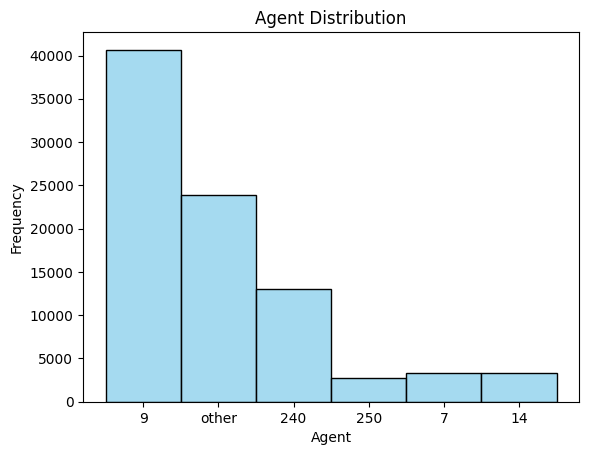

In [199]:

# Plot the distribution diagram using seaborn
sns.histplot(data=hotel_booking, x='Agent',bins='auto', color='skyblue')

# Add labels and title
plt.xlabel('Agent')
plt.ylabel('Frequency')
plt.title('Agent Distribution')

# Show the plot
plt.show()

Agent 9 is having higher bookings followed by agent code 240 

# DaysInWaitingList

In [200]:
hotel_booking['DaysInWaitingList'].value_counts()

DaysInWaitingList
0      86153
63        53
87        25
44        23
15        22
       ...  
109        1
116        1
142        1
52         1
36         1
Name: count, Length: 127, dtype: int64

In [201]:
hotel_booking['DaysInWaitingList'].describe()

count    87008.000000
mean         0.748196
std         10.013680
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        391.000000
Name: DaysInWaitingList, dtype: float64

In [202]:
hotel_booking['DaysInWaitingList'].median()

0.0

In [203]:
hotel_booking['DaysInWaitingList'].mode().item()

0

In [204]:
# we have taken minimum threshold as 3 months

hotel_booking['DaysInWaitingList_modified'] = handle_categorical_minorities(hotel_booking.DaysInWaitingList, minority_threshold=90, replace_value=91)
hotel_booking.DaysInWaitingList_modified.value_counts()

/tmp/ipykernel_39775/3310362400.py:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[column][df.is_minority] = replace_value
/tmp/ipykernel_39775/3310362400.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

DaysInWaitingList_modified
0     86153
91      855
Name: count, dtype: int64

In [205]:
hotel_booking.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,total_bookings,cancellation_ratio,DaysInWaitingList_modified
0,0,342,2015,July,27,1,0,0,2,0,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0.260616,0
1,0,737,2015,July,27,1,0,0,2,0,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0.260616,0
2,0,7,2015,July,27,1,0,1,1,0,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,0.260616,0
3,0,13,2015,July,27,1,0,1,1,0,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,0.260616,0
4,0,14,2015,July,27,1,0,2,2,0,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,0,0.260616,0


In [206]:
hotel_booking.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'DaysInWaitingList',
       'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'total_bookings', 'cancellation_ratio', 'DaysInWaitingList_modified'],
      dtype='object')

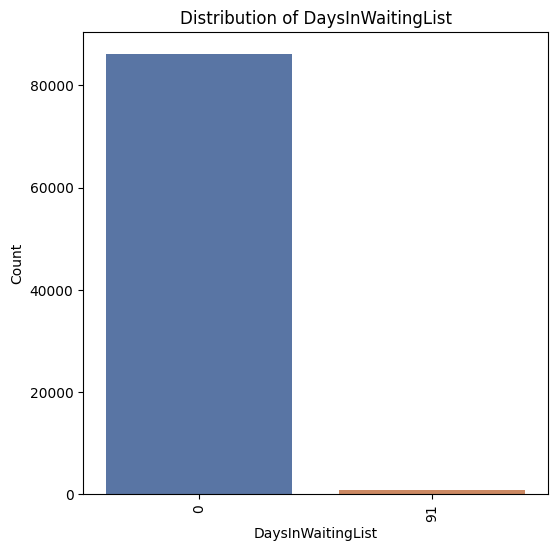

In [207]:
# Create a bar plot using seaborn
plt.figure(figsize=(6, 6))  
sns.countplot(data=hotel_booking, x='DaysInWaitingList_modified', palette='deep')

# Add labels and title
plt.xlabel('DaysInWaitingList')
plt.ylabel('Count')
plt.title('Distribution of DaysInWaitingList')
plt.xticks(rotation=90)
# Show the plot
plt.show()

hotel_booking.drop(columns=['DaysInWaitingList_modified'],inplace= True)


Majority of no.of days in waiting list is 0. But there are about 2844 bookings having waiting list days more than 91.

# CustomerType

In [208]:
hotel_booking['CustomerType'].value_counts()

CustomerType
Transient          71725
Transient-Party    11610
Contract            3133
Group                540
Name: count, dtype: int64

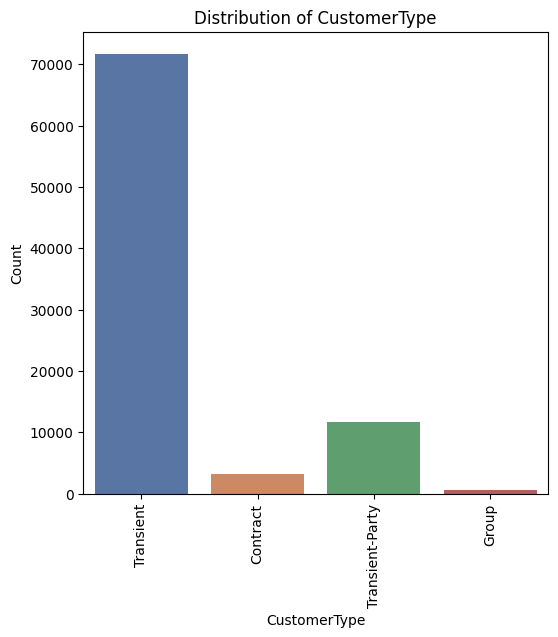

In [209]:
# Create a bar plot using seaborn
plt.figure(figsize=(6, 6))  
sns.countplot(data=hotel_booking, x='CustomerType', palette='deep')

# Add labels and title
plt.xlabel('CustomerType')
plt.ylabel('Count')
plt.title('Distribution of CustomerType')
plt.xticks(rotation=90)
# Show the plot
plt.show()

# ReservationStatus

In [210]:
hotel_booking['ReservationStatus'].value_counts()

ReservationStatus
Check-Out    63081
Canceled     22918
No-Show       1009
Name: count, dtype: int64

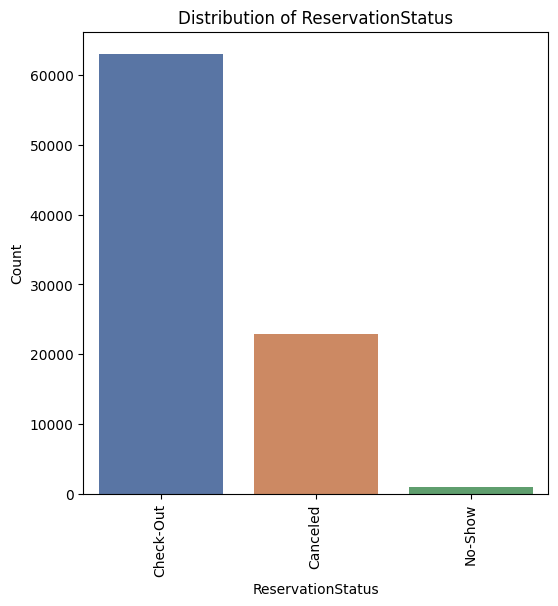

In [211]:
# Create a bar plot using seaborn
plt.figure(figsize=(6, 6))  
sns.countplot(data=hotel_booking, x='ReservationStatus', palette='deep')

# Add labels and title
plt.xlabel('ReservationStatus')
plt.ylabel('Count')
plt.title('Distribution of ReservationStatus')
plt.xticks(rotation=90)
# Show the plot
plt.show()

The bookings that are Check-out status are the majority ones followed by Canceled

# Feature Engineering

## ArrivalDateMonth


Create a map for Seasons and Weekdays name for our data analysis and visualization


For better visualization and analysis, we can derive a new column Season from ArrivalDateMonth


In [212]:

# Map from month to season (for Northern hemisphere)
seasons = {
    'Winter': ['December', 'January', 'February'],
    'Spring': ['March', 'April', 'May'],
    'Summer': ['June', 'July', 'August'],
    'Autumn': ['September', 'October', 'November']
}

# Function to map a month to a season
def month_to_season(month):
    for season, months in seasons.items():
        if month in months:
            return season
        
        
        
# Create 'season' column
hotel_booking['season'] = hotel_booking['ArrivalDateMonth'].apply(month_to_season)
hotel_booking['season'].unique()


array(['Summer', 'Autumn', 'Winter', 'Spring'], dtype=object)

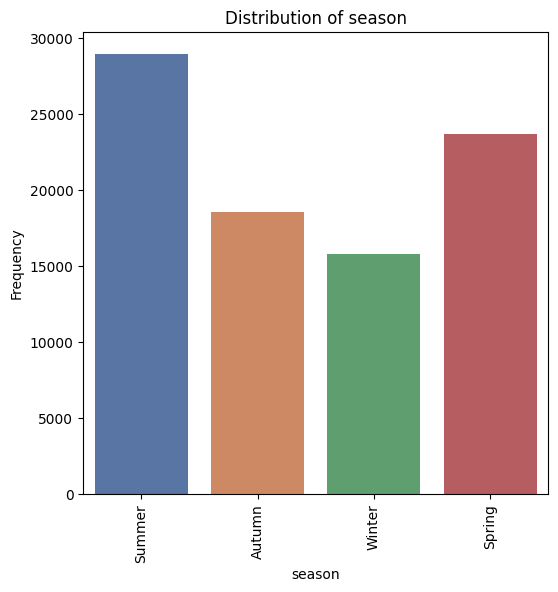

In [213]:

# Create a bar plot using seaborn
plt.figure(figsize=(6, 6))  
sns.countplot(data=hotel_booking, x='season', palette='deep')

# Add labels and title
plt.xlabel('season')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('Distribution of season')

# Show the plot
plt.show()

Summer and Spring season have more booking when compared to the others

# ArrivalDateYear,ArrivalDateMonth,ArrivalDateDayOfMonth

Let's combine the features ArrivalDateYear,ArrivalDateMonth,ArrivalDateDayOfMonth to a single column and take only the day of the week as 'DayOfWeek'


In [214]:
# Create 'day_of_week' column
hotel_booking['date'] = hotel_booking.apply(lambda row: datetime.strptime(f"{int(row['ArrivalDateYear'])} {row['ArrivalDateMonth']} {int(row['ArrivalDateDayOfMonth'])}", "%Y %B %d"), axis=1)
hotel_booking['DayOfWeek'] = hotel_booking['date'].dt.day_name()

# Drop the 'date' column as we no longer need it
hotel_booking = hotel_booking.drop(columns=['date'])


hotel_booking['DayOfWeek'].unique()


array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

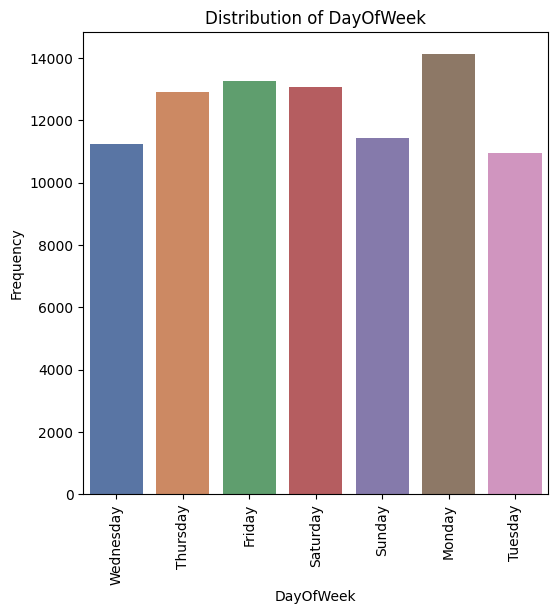

In [215]:

# Create a bar plot using seaborn
plt.figure(figsize=(6, 6))  
sns.countplot(data=hotel_booking, x='DayOfWeek', palette='deep')

# Add labels and title
plt.xlabel('DayOfWeek')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('Distribution of DayOfWeek')

# Show the plot
plt.show()

It is evident that Friday, Thursday, Monday respectively have more booking arrivals in a week.

## Country

In [216]:
hotel_booking['Country'].value_counts()

Country
PRT    27746
GBR    10411
FRA     8799
ESP     7232
DEU     5372
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: count, Length: 177, dtype: int64

In [217]:
hotel_booking.Country = handle_categorical_minorities(hotel_booking.Country, minority_threshold=5000, replace_value='other')
hotel_booking.Country.value_counts()

/tmp/ipykernel_39775/3310362400.py:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[column][df.is_minority] = replace_value
/tmp/ipykernel_39775/3310362400.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

Country
PRT      27746
other    27448
GBR      10411
FRA       8799
ESP       7232
DEU       5372
Name: count, dtype: int64

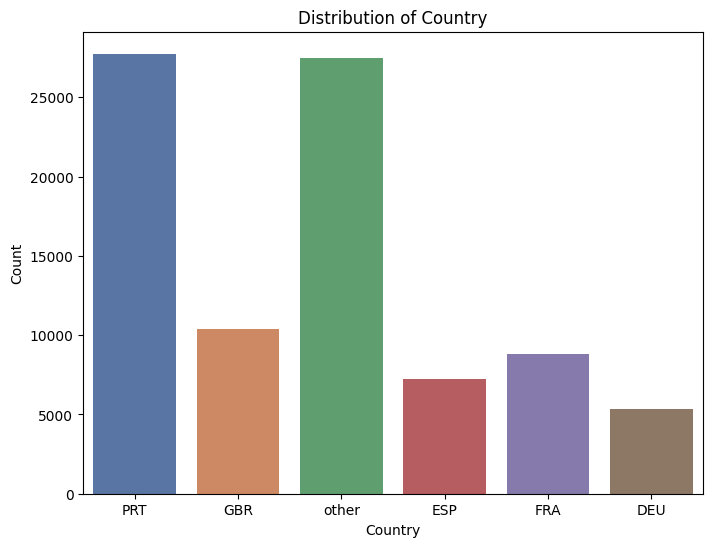

In [218]:
# Create a bar plot using seaborn
plt.figure(figsize=(8, 6))  
sns.countplot(data=hotel_booking, x='Country', palette='deep')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Country')

# Show the plot
plt.show()

Country with code 'PRT' is higher

# LeadTime

Lead Time Distribution: Most of the bookings have a lead time of less than 200 days. However, there are bookings with a lead time of up to 700 days. The points that are above upper whisker can be considered as outliers and is Capped with the value 'Q3 + 1.5 * IQR'

In [219]:
Q3 = hotel_booking['LeadTime'].quantile(0.75)
Q1 = hotel_booking['LeadTime'].quantile(0.25)
IQR = Q3 - Q1

# Identify indices of values to be replaced
indices_to_replace = hotel_booking.index[hotel_booking['LeadTime'] > Q3 + 1.5 * IQR]

# Replace values greater than Q3 + 1.5 * IQR with Q3 + 1.5 * IQR
hotel_booking.loc[indices_to_replace, 'LeadTime'] = Q3 + 1.5 * IQR
hotel_booking

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,total_bookings,cancellation_ratio,season,DayOfWeek
0,0,296,2015,July,27,1,0,0,2,0,...,Transient,0.00,0,0,Check-Out,2015-07-01,0,0.260616,Summer,Wednesday
1,0,296,2015,July,27,1,0,0,2,0,...,Transient,0.00,0,0,Check-Out,2015-07-01,0,0.260616,Summer,Wednesday
2,0,7,2015,July,27,1,0,1,1,0,...,Transient,75.00,0,0,Check-Out,2015-07-02,0,0.260616,Summer,Wednesday
3,0,13,2015,July,27,1,0,1,1,0,...,Transient,75.00,0,0,Check-Out,2015-07-02,0,0.260616,Summer,Wednesday
4,0,14,2015,July,27,1,0,2,2,0,...,Transient,98.00,0,1,Check-Out,2015-07-03,0,0.260616,Summer,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,August,35,30,2,5,2,0,...,Transient,96.14,0,0,Check-Out,2017-09-06,0,0.260616,Summer,Wednesday
119386,0,102,2017,August,35,31,2,5,3,0,...,Transient,225.43,0,2,Check-Out,2017-09-07,0,0.260616,Summer,Thursday
119387,0,34,2017,August,35,31,2,5,2,0,...,Transient,157.71,0,4,Check-Out,2017-09-07,0,0.260616,Summer,Thursday
119388,0,109,2017,August,35,31,2,5,2,0,...,Transient,104.40,0,0,Check-Out,2017-09-07,0,0.260616,Summer,Thursday


/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


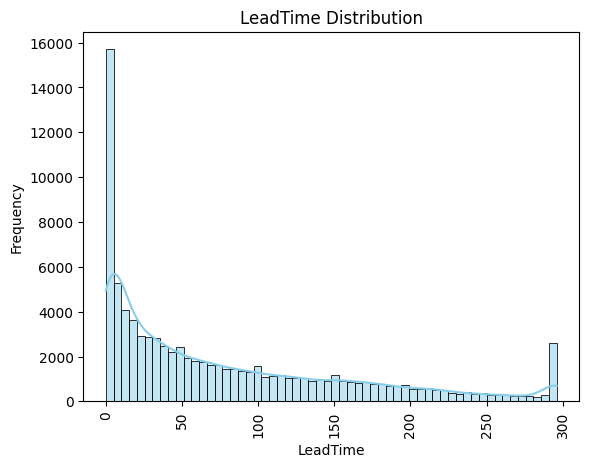

The skewness value is 1.101271746884343


In [220]:
# Plot the distribution diagram using seaborn
sns.histplot(data=hotel_booking, x='LeadTime', kde=True, color='skyblue')

# Add labels and title
plt.xlabel('LeadTime')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('LeadTime Distribution')

# Show the plot
plt.show()

# Calculate skewness
print(toFindSkewness('LeadTime'))

The distribution is positively skewed

# EDA

## Number of cancelations by Agent

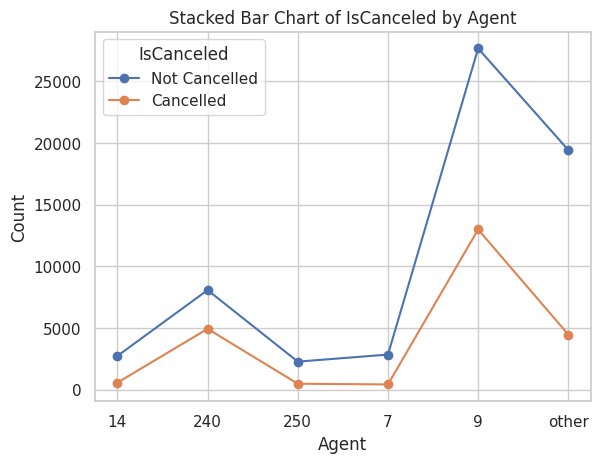

In [221]:


# Grouping and counting based on 'Agent' and 'IsCanceled'
grouped_data = hotel_booking.groupby(['Agent', 'IsCanceled']).size().unstack()

# Creating the stacked bar plot
sns.set(style="whitegrid")
# grouped_data.plot(kind='bar', stacked=True)
grouped_data.plot(kind='line', marker='o')
# Adding labels and title
plt.xlabel('Agent')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of IsCanceled by Agent')

plt.legend(title='IsCanceled', labels=['Not Cancelled', 'Cancelled'])

plt.show()


From this stacked line chart, we could understand the which Agent's bookings are more prone to be cancelled based on previous cancellations.

# DaysInWaitingList

In [222]:
hotel_booking['DaysInWaitingList'].value_counts()

DaysInWaitingList
0      86153
63        53
87        25
44        23
15        22
       ...  
109        1
116        1
142        1
52         1
36         1
Name: count, Length: 127, dtype: int64

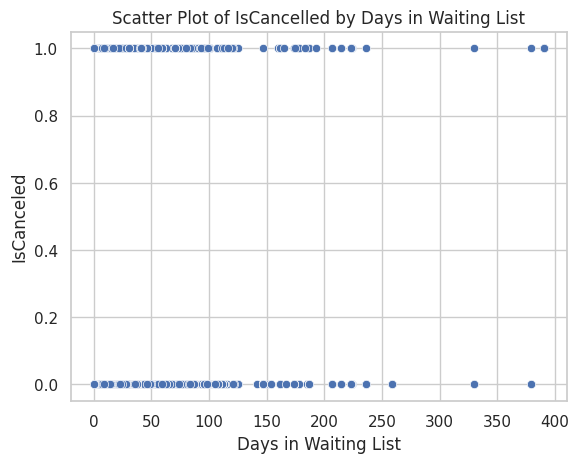

In [223]:


# Create a scatter plot
sns.set(style="whitegrid")
sns.scatterplot(data=hotel_booking, x='DaysInWaitingList', y='IsCanceled')

# Adding labels and title
plt.xlabel('Days in Waiting List')
plt.ylabel('IsCanceled')
plt.title('Scatter Plot of IsCancelled by Days in Waiting List')

plt.show()


# Number of Bookings per Month


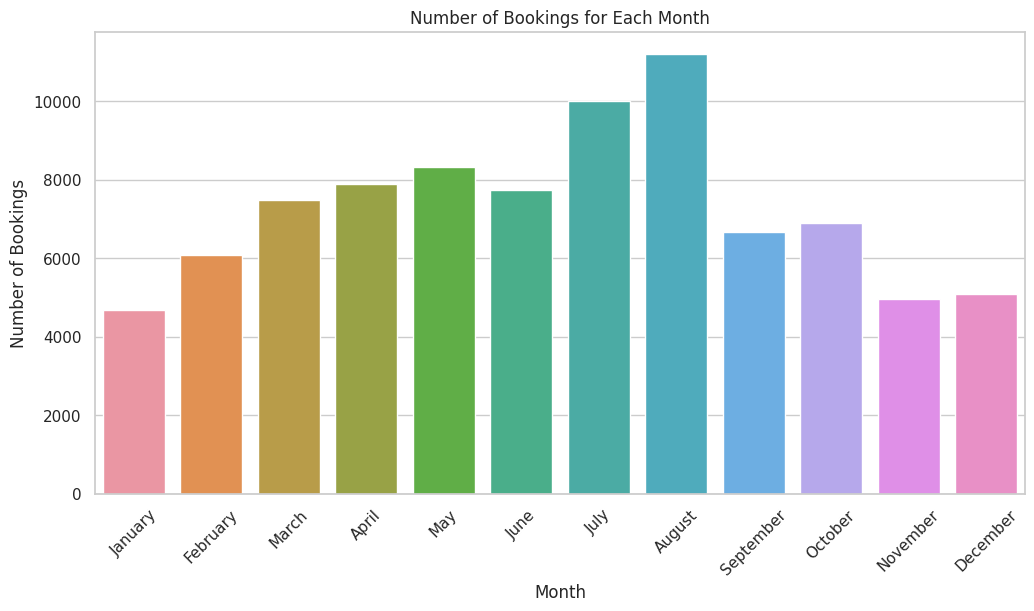

In [224]:
# Order of the months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Plot the number of bookings for each month
plt.figure(figsize=(12,6))
sns.countplot(x='ArrivalDateMonth', data=hotel_booking, order=months_order)
plt.title('Number of Bookings for Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

The number of bookings varies across the months, with August being the month with the most bookings and January being the month with the least bookings.


# Total ADR for each month

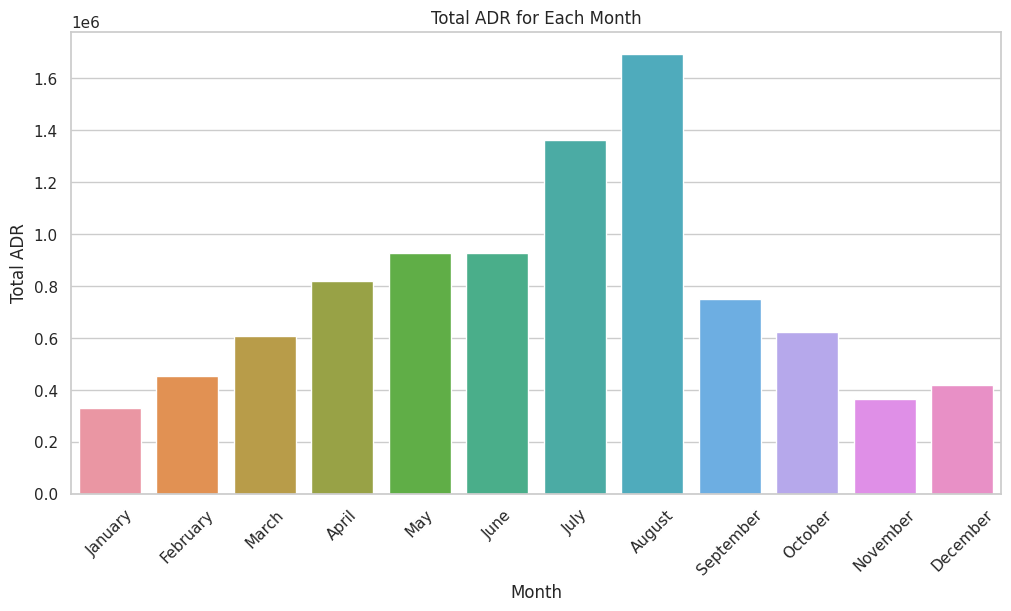

In [225]:
# Calculate the total ADR for each month
total_adr_month = hotel_booking.groupby('ArrivalDateMonth')['ADR'].sum().reindex(months_order)

# Create a bar plot for total ADR in each month
plt.figure(figsize=(12,6))
sns.barplot(x=total_adr_month.index, y=total_adr_month.values)
plt.title('Total ADR for Each Month')
plt.xlabel('Month')
plt.ylabel('Total ADR')
plt.xticks(rotation=45)
plt.show()

ADR is higher in month of August and lowest in January which is in line with bookings per each month

# Top 10 countries with the most bookings

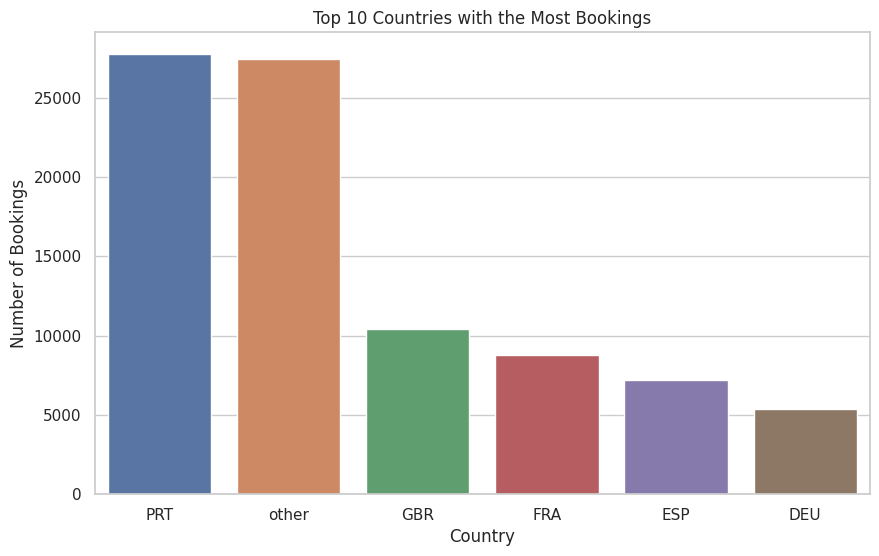

In [226]:
# Top 10 countries with the most bookings
top_countries = hotel_booking['Country'].value_counts().head(10)

# Plot the top 10 countries
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries with the Most Bookings')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.show()

The majority of bookings are quoted from Portugal (PRT), then  Great Britain (GBR), France (FRA), Spain (ESP), and Germany (DEU). The other countries in the top 10 are Ireland (IRL), Italy (ITA), Belgium (BEL), Brazil (BRA), and the Netherlands (NLD).

In [227]:
print('-'*30)
print('Total Bookings canceled')
print('-'*30)
print(hotel_booking.IsCanceled.value_counts())
print('-'*30)
print('Cancelation percent in hotels')
print('-'*30)
print(hotel_booking.IsCanceled.value_counts(normalize=True))

------------------------------
Total Bookings canceled
------------------------------
IsCanceled
0    63081
1    23927
Name: count, dtype: int64
------------------------------
Cancelation percent in hotels
------------------------------
IsCanceled
0    0.725002
1    0.274998
Name: proportion, dtype: float64


only 37% bookings are cancelled overall

# Average Total Bookings vs Canceled Bookings Per Week of the Year

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

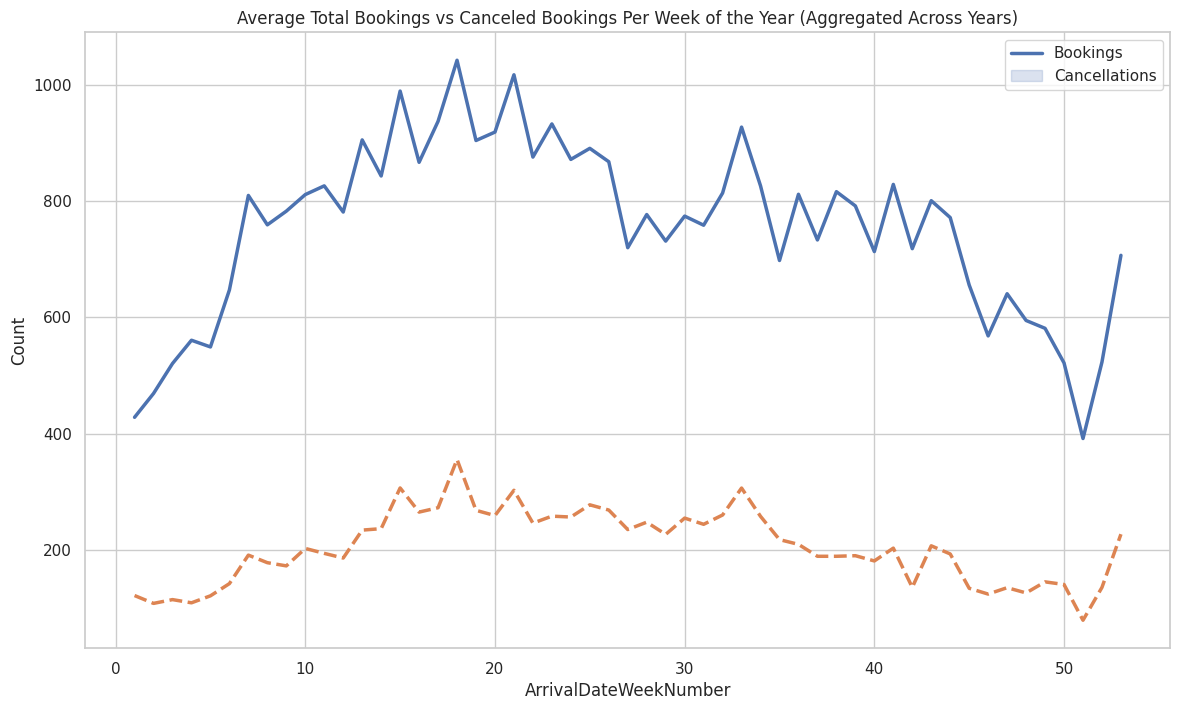

In [228]:
# Create a new column for total bookings
hotel_booking['Total_bookings'] = 1

# Create the weekly dataframe
hotel_weekly = hotel_booking.groupby(['ArrivalDateYear', 'ArrivalDateWeekNumber']).agg({'IsCanceled': 'sum', 'Total_bookings': 'count'}).reset_index()

# Create the monthly dataframe
hotel_monthly = hotel_booking.groupby(['ArrivalDateYear', 'ArrivalDateMonth']).agg({'IsCanceled': 'sum', 'Total_bookings': 'count'}).reset_index()

# Aggregate the data across all years
hotel_weekly_agg = hotel_weekly.groupby('ArrivalDateWeekNumber').agg({'IsCanceled': 'mean', 'Total_bookings': 'mean'}).reset_index()
hotel_monthly_agg = hotel_monthly.groupby('ArrivalDateMonth').agg({'IsCanceled': 'mean', 'Total_bookings': 'mean'}).reset_index()

# Plot the weekly trend
plt.figure(figsize=(14, 8))
sns.lineplot(x='ArrivalDateWeekNumber', y='Total_bookings', data=hotel_weekly_agg, linewidth=2.5)
sns.lineplot(x='ArrivalDateWeekNumber', y='IsCanceled', data=hotel_weekly_agg, linewidth=2.5, linestyle='--')
plt.title('Average Total Bookings vs Canceled Bookings Per Week of the Year (Aggregated Across Years)')
plt.ylabel('Count')
plt.legend(['Bookings', 'Cancellations'])
plt.show()

The no. of bookings and cancellations  fluctuate over the weeks.

# Average Total Bookings vs Canceled Bookings Per Month of the Year

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

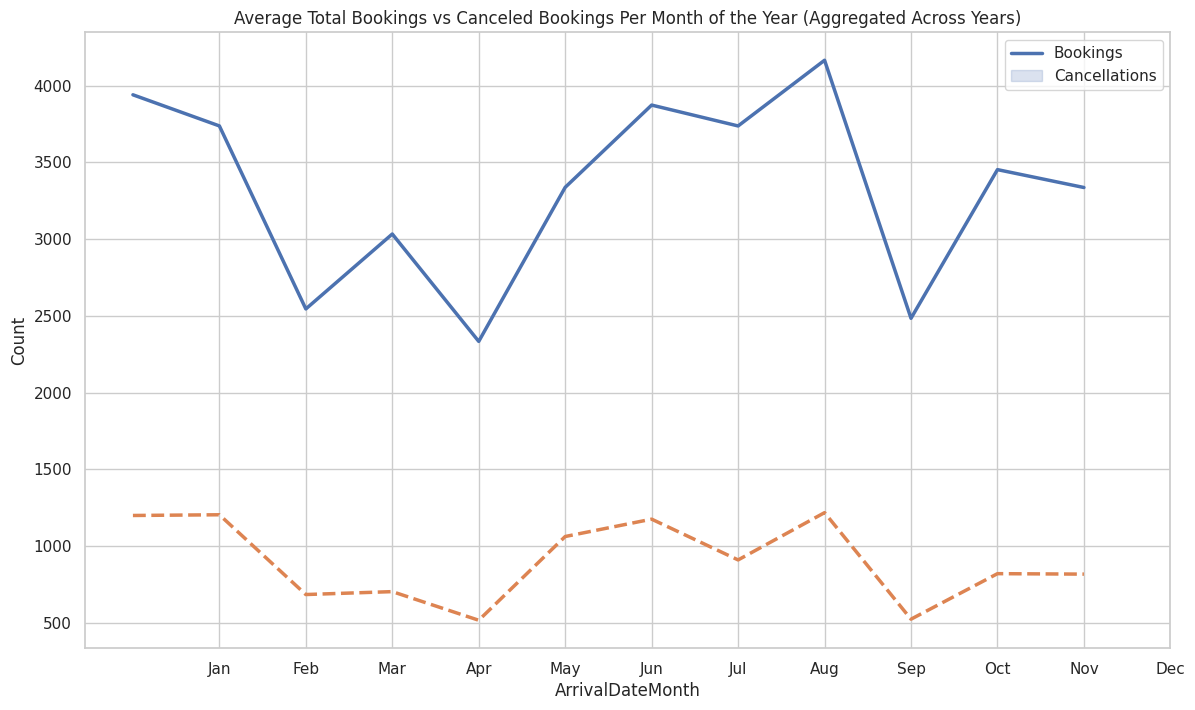

In [229]:
# Plot the monthly trend
plt.figure(figsize=(14, 8))
sns.lineplot(x='ArrivalDateMonth', y='Total_bookings', data=hotel_monthly_agg, linewidth=2.5)
sns.lineplot(x='ArrivalDateMonth', y='IsCanceled', data=hotel_monthly_agg, linewidth=2.5, linestyle='--')
plt.title('Average Total Bookings vs Canceled Bookings Per Month of the Year (Aggregated Across Years)')
plt.ylabel('Count')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(['Bookings', 'Cancellations'])
plt.show()
hotel_booking.drop(columns=['Total_bookings'],inplace= True)

Total bookings and cancellations fluctuate over months

In [230]:
hotel_booking['DaysInWaitingList'].describe()

count    87008.000000
mean         0.748196
std         10.013680
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        391.000000
Name: DaysInWaitingList, dtype: float64

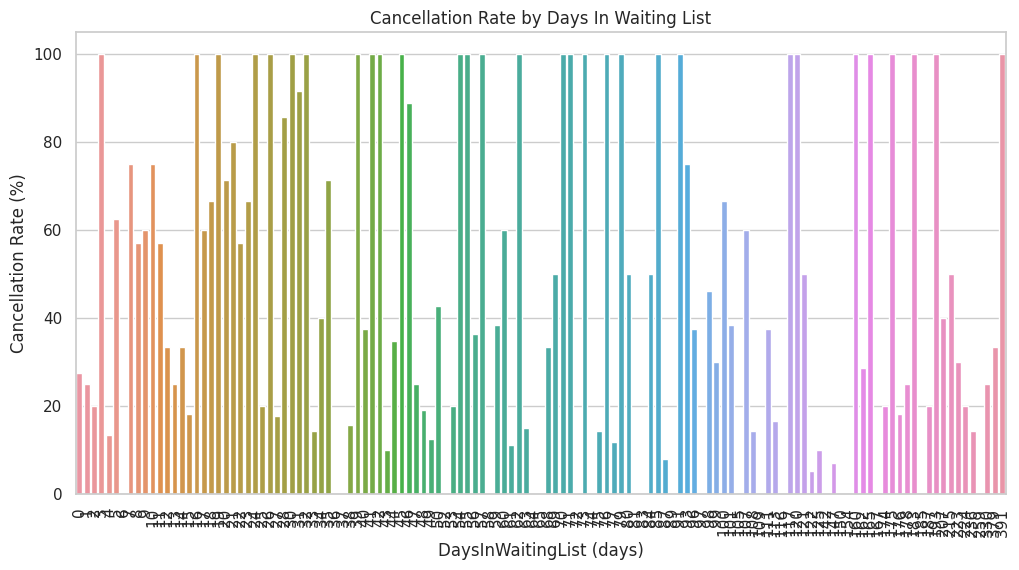

In [231]:
bins = [0, 25, 50, 75, 100,125, 150, 175,200,225, 250, 275,300,325, 350, 375,400]
bins = [0,  100,200,300,400]

# Add a new column for DaysInWaitingList category
hotel_booking['days_in_waiting_list_category'] = pd.cut(hotel_booking['DaysInWaitingList'], bins)

# Calculate overall cancellation rate for each DaysInWaitingList category
cancellation_rates = hotel_booking.groupby('DaysInWaitingList')['IsCanceled'].mean() * 100

# Plot cancellation rates
plt.figure(figsize=(12, 6))
sns.barplot(x=cancellation_rates.index, y=cancellation_rates.values)
plt.title('Cancellation Rate by Days In Waiting List')
plt.xlabel('DaysInWaitingList (days)')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=90)
plt.show()

hotel_booking.drop(columns=['days_in_waiting_list_category'],inplace= True)

# Overall cancellation rate for each lead time category

In [232]:
hotel_booking['LeadTime'].describe()

count    87008.000000
mean        78.335670
std         80.995861
min          0.000000
25%         11.000000
50%         49.000000
75%        125.000000
max        296.000000
Name: LeadTime, dtype: float64

/tmp/ipykernel_39775/1595424728.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancellation_rates = hotel_booking.groupby('lead_time_category')['IsCanceled'].mean() * 100
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


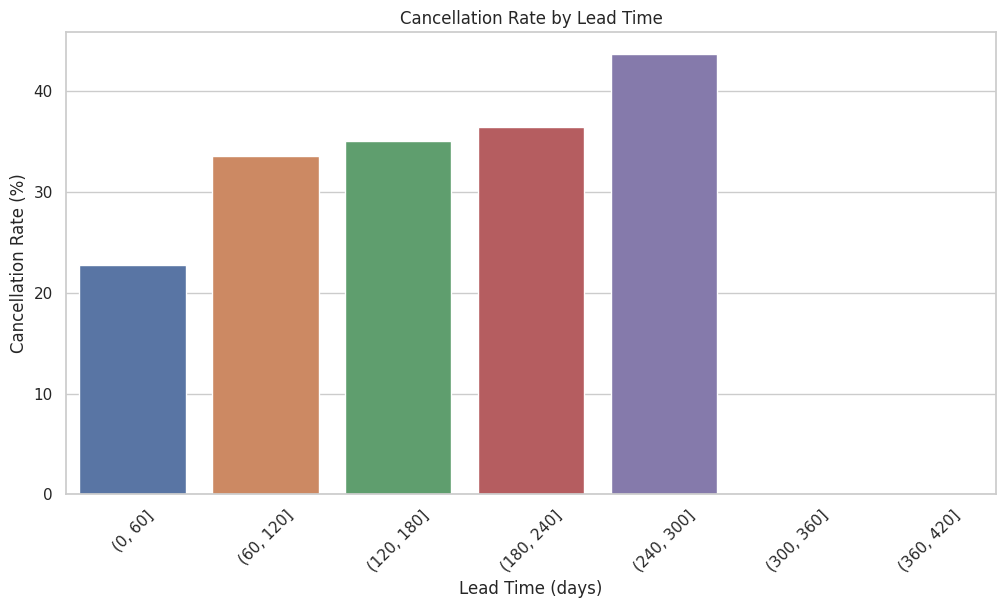

In [233]:
# Define bins for lead time
bins = [0, 60, 120, 180, 240, 300, 360, 420]

# Add a new column for lead time category
hotel_booking['lead_time_category'] = pd.cut(hotel_booking['LeadTime'], bins)

# Calculate overall cancellation rate for each lead time category
cancellation_rates = hotel_booking.groupby('lead_time_category')['IsCanceled'].mean() * 100

# Plot cancellation rates
plt.figure(figsize=(12, 6))
sns.barplot(x=cancellation_rates.index, y=cancellation_rates.values)
plt.title('Cancellation Rate by Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45)
plt.show()

hotel_booking.drop(columns=['lead_time_category'],inplace= True)

# Correlation Matrix

In [234]:
def find_pearson_correlation(X_train_parametric_df,parametric_continuous_features, figsize=(30, 30), threshold_correlation=0.5):

    fig, ax = plt.subplots(figsize=figsize)
    correlation = X_train_parametric_df[parametric_continuous_features].corr()
    sns.heatmap(correlation, annot=True
                , fmt=".2f", cmap="coolwarm")
    plt.title("Pearson correlation coefficient- Heatmap")

    high_correlation_dict = {}

    for column in correlation.columns[2:]:
        correlated_columns = [col for col in correlation[column][(correlation[column] > threshold_correlation) | (correlation[column] < -threshold_correlation)].index.tolist()
                              if col != column]
        if correlated_columns:
            high_correlation_dict[column] = correlated_columns




    return correlation, high_correlation_dict

In [235]:
continuous_hotel_booking = hotel_booking[continuous_columns]

In [236]:
scaler = MinMaxScaler()

continuous_attributes_df_normalized = pd.DataFrame(scaler.fit_transform(continuous_hotel_booking),
                                                   columns=continuous_hotel_booking.columns)

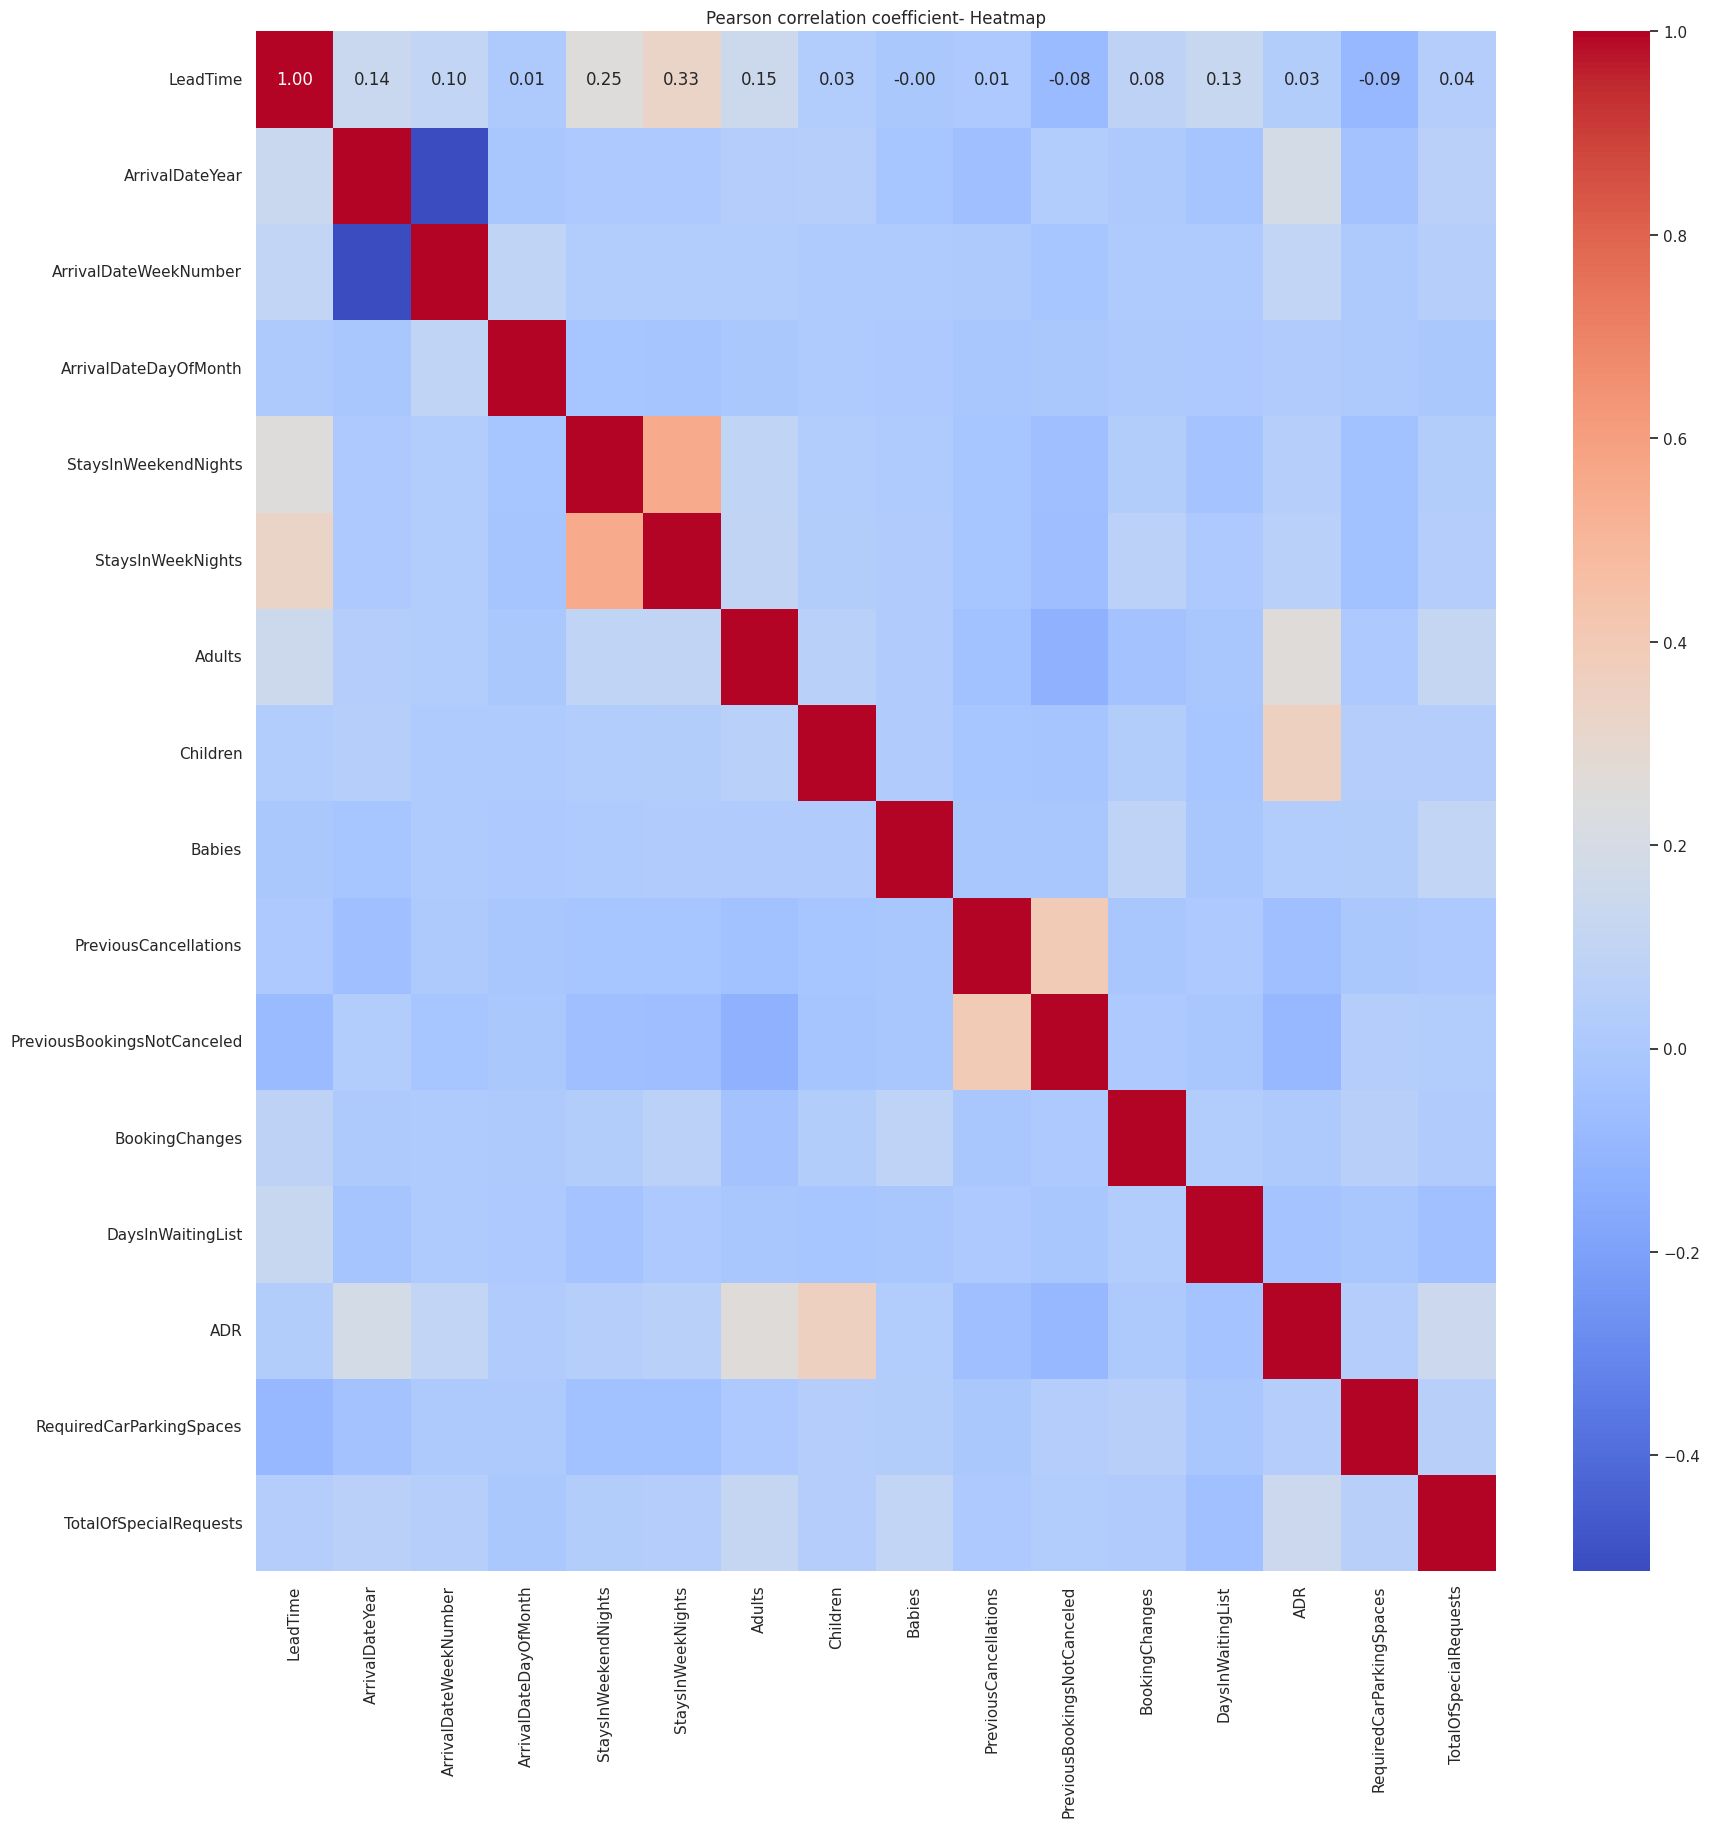

In [237]:
_ = find_pearson_correlation(continuous_attributes_df_normalized,
                         continuous_attributes_df_normalized.columns,
                         figsize=(20, 20),
                         threshold_correlation=0.5)

# Feature Pruning

Now let's discard the unnecessary columns

In [238]:
hotel_booking.drop(columns=['ReservationStatusDate'],inplace= True)

In [239]:
hotel_booking.head()


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,total_bookings,cancellation_ratio,season,DayOfWeek
0,0,296,2015,July,27,1,0,0,2,0,...,0,Transient,0.0,0,0,Check-Out,0,0.260616,Summer,Wednesday
1,0,296,2015,July,27,1,0,0,2,0,...,0,Transient,0.0,0,0,Check-Out,0,0.260616,Summer,Wednesday
2,0,7,2015,July,27,1,0,1,1,0,...,0,Transient,75.0,0,0,Check-Out,0,0.260616,Summer,Wednesday
3,0,13,2015,July,27,1,0,1,1,0,...,0,Transient,75.0,0,0,Check-Out,0,0.260616,Summer,Wednesday
4,0,14,2015,July,27,1,0,2,2,0,...,0,Transient,98.0,0,1,Check-Out,0,0.260616,Summer,Wednesday


In [240]:
hotel_booking['Country'].value_counts()

Country
PRT      27746
other    27448
GBR      10411
FRA       8799
ESP       7232
DEU       5372
Name: count, dtype: int64

# Label Encoding

Define a list with only categorical features

In [241]:
categorical_columns = ['IsRepeatedGuest','ArrivalDateMonth', 'Meal', 'Country', 'MarketSegment',
       'DistributionChannel', 'ReservedRoomType', 'AssignedRoomType',
       'DepositType', 'Agent', 'CustomerType', 'ReservationStatus','season','DayOfWeek']

In [242]:
encoded_hotel_booking = pd.get_dummies(hotel_booking, columns= categorical_columns)
encoded_hotel_booking.head()


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,...,season_Spring,season_Summer,season_Winter,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,0,296,2015,27,1,0,0,2,0,0,...,False,True,False,False,False,False,False,False,False,True
1,0,296,2015,27,1,0,0,2,0,0,...,False,True,False,False,False,False,False,False,False,True
2,0,7,2015,27,1,0,1,1,0,0,...,False,True,False,False,False,False,False,False,False,True
3,0,13,2015,27,1,0,1,1,0,0,...,False,True,False,False,False,False,False,False,False,True
4,0,14,2015,27,1,0,2,2,0,0,...,False,True,False,False,False,False,False,False,False,True


In [243]:
encoded_hotel_booking.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies',
       ...
       'season_Spring', 'season_Summer', 'season_Winter', 'DayOfWeek_Friday',
       'DayOfWeek_Monday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday',
       'DayOfWeek_Thursday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday'],
      dtype='object', length=101)

In [244]:
#The resultant dataframe is saved with the name hotel_booking_encoded.csv

encoded_hotel_booking.to_csv('hotel_booking-encoded.csv', index=False)

Now we can remove one column each from the encoded column catgeories. For eg: In case of IsRepeatedGuest_1,IsRepeatedGuest_0...we need to keep any one of those as both denotes the same

In [245]:
columns_to_be_removed = ['IsRepeatedGuest_0','ArrivalDateMonth_September','Meal_no_meals','Country_other','MarketSegment_Aviation',
                        'DistributionChannel_Corporate','ReservedRoomType_L               ','AssignedRoomType_L               ','DepositType_No Deposit     ',
                         'Agent_other','CustomerType_Transient-Party',
                        'ReservationStatus_No-Show','season_Autumn','DayOfWeek_Wednesday',]

In [246]:
# Dropping columns to avoid reduntancy


encoded_hotel_booking.drop(columns=columns_to_be_removed, inplace=True)

In [247]:
encoded_hotel_booking.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList',
       'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'total_bookings', 'cancellation_ratio', 'IsRepeatedGuest_1',
       'ArrivalDateMonth_April', 'ArrivalDateMonth_August',
       'ArrivalDateMonth_December', 'ArrivalDateMonth_February',
       'ArrivalDateMonth_January', 'ArrivalDateMonth_July',
       'ArrivalDateMonth_June', 'ArrivalDateMonth_March',
       'ArrivalDateMonth_May', 'ArrivalDateMonth_November',
       'ArrivalDateMonth_October', 'Meal_BB', 'Meal_FB', 'Meal_HB',
       'Country_DEU', 'Country_ESP', 'Country_FRA', 'Country_GBR',
       'Country_PRT', 'MarketSegment_Complementary', 'MarketSegment_Corporate',
       'MarketSegment_Direct', 'MarketSegment_Group

In [248]:
encoded_hotel_booking.shape

(87008, 87)

# Calculation of Feature Importance using Random Forest

In [249]:
def feature_importance(df, label_name, method = "random_forest"):

    if not method:
        print("Enter valid method to find feature importance")
        return

    if method=="random_forest":
        X = df.drop([label_name], axis=1)  # remove target column from features
        y = df[label_name]

        rf = RandomForestClassifier(n_estimators=5, random_state=42)
        rf.fit(X, y)

        # get feature importances from the model
        importances = rf.feature_importances_

        # sort the features by importance in descending order
        sorted_idx = importances.argsort()[::-1]

        # plot the feature importances
        fig, ax = plt.subplots(figsize=(20, 10))

        plt.bar(range(X.shape[1]), importances[sorted_idx])
        plt.xticks(range(X.shape[1]), X.columns[sorted_idx], rotation=90)
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.title('Feature Importance')
        plt.show()

        return X.columns[sorted_idx]

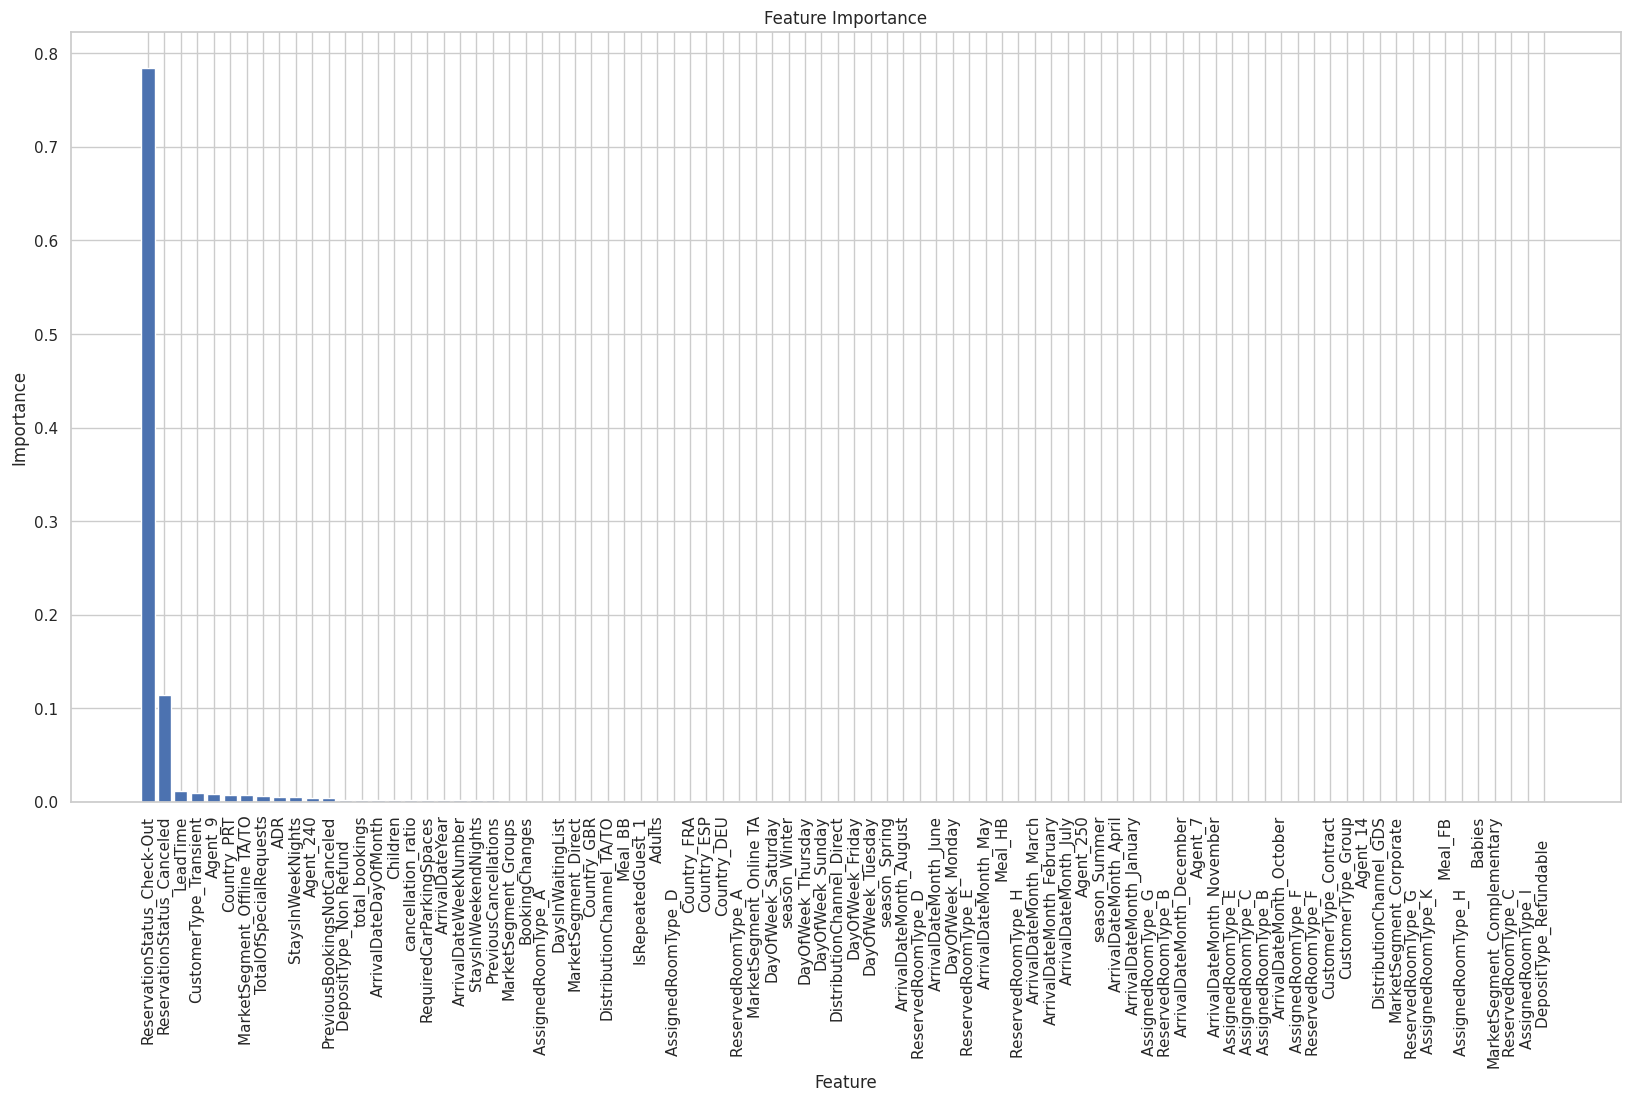

Index(['ReservationStatus_Check-Out', 'ReservationStatus_Canceled', 'LeadTime',
       'CustomerType_Transient', 'Agent_9', 'Country_PRT',
       'MarketSegment_Offline TA/TO', 'TotalOfSpecialRequests', 'ADR',
       'StaysInWeekNights', 'Agent_240', 'PreviousBookingsNotCanceled',
       'DepositType_Non Refund     ', 'total_bookings',
       'ArrivalDateDayOfMonth', 'Children', 'cancellation_ratio',
       'RequiredCarParkingSpaces', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'StaysInWeekendNights', 'PreviousCancellations', 'MarketSegment_Groups',
       'BookingChanges', 'AssignedRoomType_A               ',
       'DaysInWaitingList', 'MarketSegment_Direct', 'Country_GBR',
       'DistributionChannel_TA/TO', 'Meal_BB', 'IsRepeatedGuest_1', 'Adults',
       'AssignedRoomType_D               ', 'Country_FRA', 'Country_ESP',
       'Country_DEU', 'ReservedRoomType_A               ',
       'MarketSegment_Online TA', 'DayOfWeek_Saturday', 'season_Winter',
       'DayOfWeek_Thursd

In [250]:
feature_importance(encoded_hotel_booking, label_name='IsCanceled')

# Model Training

In [251]:
def run_train_test_split(df, label_name, test_ratio=0.3):
    X = df.drop([label_name], axis=1)
    y = df[label_name]
    
    # Splitting the data into train/test features and label
    X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X, y, test_size=test_ratio, random_state=42)

    # Print the shapes of the training and testing sets
    print('Training set shape:', X_train_df.shape, y_train_df.shape)
    print('Testing set shape:', X_test_df.shape, y_test_df.shape)

    return X_train_df, X_test_df, y_train_df, y_test_df

In [252]:
def train_test(classifier, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=48)
    classifier.fit(X_train, y_train)
    
    y_test_pred = classifier.predict(X_test)
    y_train_pred = classifier.predict(X_train)
    
    # Evaluate the performance
   
    
    
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    
    
    test_precision = precision_score(y_test, y_test_pred)
    train_precision = precision_score(y_train, y_train_pred)
    
   
    
    test_recall = recall_score(y_test, y_test_pred)
    train_recall = recall_score(y_train, y_train_pred)

   
    
    test_f1 = f1_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    
    print('-'*30)
    print('Performance Metrics')
    print('-'*30)
    
    
    print('Metrics                Train           Test')
    print('-'*60)
    print("Accuracy:              {:.2f}           {:.2f}".format(train_accuracy, test_accuracy))
    
    
    print('-'*60)
    print("Precision:             {:.2f}           {:.2f}".format(train_precision, test_precision))
    
    
    print('-'*60)
    print("Recall:                {:.2f}           {:.2f}".format(train_recall, test_recall))
    
 
    print('-'*60)
    print("F1 Score:              {:.2f}           {:.2f}".format(train_f1, test_f1))
    
    return classifier, train_accuracy, test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1

In [253]:
X = encoded_hotel_booking.drop(columns=['IsCanceled'])
y = encoded_hotel_booking['IsCanceled']

In [254]:
models_info_dict_list = []

### Trial 1- Random Forest with default configuration

In [255]:
trial1 = Pipeline([
    ("classifier", RandomForestClassifier(random_state=0))
])
clf,train_accuracy, test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1 = train_test(trial1, X, y)
models_info_dict_list.append({'model_id':'trial1',
                             'train_accuracy':train_accuracy,
                              'test_accuracy':test_accuracy,
                              'train_precision':train_precision,
                              'test_precision':test_precision,
                              'train_recall':train_recall,
                              'test_recall':test_recall,
                              'train_f1':train_f1,
                              'test_f1':test_f1
                             })

------------------------------
Performance Metrics
------------------------------
Metrics                Train           Test
------------------------------------------------------------
Accuracy:              1.00           1.00
------------------------------------------------------------
Precision:             1.00           1.00
------------------------------------------------------------
Recall:                1.00           1.00
------------------------------------------------------------
F1 Score:              1.00           1.00


## Trial 2- PCA with 95 percent variance + Random Forest with default configuration

In [256]:
trial2 = Pipeline([
    ("pca", PCA(n_components=0.95)),  # Add PCA with 95% explained variance
    ("classifier", RandomForestClassifier(random_state=0))
])

clf,train_accuracy, test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1 = train_test(trial2, X, y)
models_info_dict_list.append({'model_id':'trial2',
                             'train_accuracy':train_accuracy,
                              'test_accuracy':test_accuracy,
                              'train_precision':train_precision,
                              'test_precision':test_precision,
                              'train_recall':train_recall,
                              'test_recall':test_recall,
                              'train_f1':train_f1,
                              'test_f1':test_f1
                             })

------------------------------
Performance Metrics
------------------------------
Metrics                Train           Test
------------------------------------------------------------
Accuracy:              1.00           0.71
------------------------------------------------------------
Precision:             1.00           0.45
------------------------------------------------------------
Recall:                1.00           0.31
------------------------------------------------------------
F1 Score:              1.00           0.37


# Trial 3- Standard Scalar + PCA with 95 percent variance + Random Forest with default configuration

In [257]:
trial3 = Pipeline([
    ("scaler", StandardScaler()),       # Add StandardScaler for normalization    
    ("pca", PCA(n_components=0.95)),  # Add PCA with 95% explained variance
    ("classifier", RandomForestClassifier(random_state=0))
])

clf,train_accuracy, test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1 = train_test(trial3, X, y)
models_info_dict_list.append({'model_id':'trial3',
                             'train_accuracy':train_accuracy,
                              'test_accuracy':test_accuracy,
                              'train_precision':train_precision,
                              'test_precision':test_precision,
                              'train_recall':train_recall,
                              'test_recall':test_recall,
                              'train_f1':train_f1,
                              'test_f1':test_f1
                             })

------------------------------
Performance Metrics
------------------------------
Metrics                Train           Test
------------------------------------------------------------
Accuracy:              1.00           0.99
------------------------------------------------------------
Precision:             1.00           1.00
------------------------------------------------------------
Recall:                1.00           0.97
------------------------------------------------------------
F1 Score:              1.00           0.98


# Trial 4- MinMax Scaler + PCA with 95 percent variance + Random Forest with default configuration

In [258]:
trial4 = Pipeline([
    ("scaler", MinMaxScaler()),       # Add MinMaxScaler for normalization
    ("pca", PCA(n_components=0.95)),  # Add PCA with 95% explained variance
    ("classifier",RandomForestClassifier(random_state=0))
])

clf,train_accuracy, test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1= train_test(trial4, X, y)
models_info_dict_list.append({'model_id':'trial4',
                             'train_accuracy':train_accuracy,
                              'test_accuracy':test_accuracy,
                              'train_precision':train_precision,
                              'test_precision':test_precision,
                              'train_recall':train_recall,
                              'test_recall':test_recall,
                              'train_f1':train_f1,
                              'test_f1':test_f1
                             })

------------------------------
Performance Metrics
------------------------------
Metrics                Train           Test
------------------------------------------------------------
Accuracy:              1.00           1.00
------------------------------------------------------------
Precision:             1.00           1.00
------------------------------------------------------------
Recall:                1.00           0.99
------------------------------------------------------------
F1 Score:              1.00           1.00


# Trial 5- Logistic regression + Standard Scaler

In [259]:
# Define the pipeline with Logistic Regression and StandardScaler
trial5 = Pipeline([
    ("scaler", StandardScaler()),       # Add StandardScaler for normalization
    ("classifier", LogisticRegression())
])

clf,train_accuracy, test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1 = train_test(trial5, X, y)
models_info_dict_list.append({'model_id':'trial5',
                             'train_accuracy':train_accuracy,
                              'test_accuracy':test_accuracy,
                              'train_precision':train_precision,
                              'test_precision':test_precision,
                              'train_recall':train_recall,
                              'test_recall':test_recall,
                              'train_f1':train_f1,
                              'test_f1':test_f1
                             })

------------------------------
Performance Metrics
------------------------------
Metrics                Train           Test
------------------------------------------------------------
Accuracy:              1.00           1.00
------------------------------------------------------------
Precision:             1.00           1.00
------------------------------------------------------------
Recall:                1.00           1.00
------------------------------------------------------------
F1 Score:              1.00           1.00


# Trial 6- Logistic regression + MinMax Scaler

In [260]:
# Define the pipeline with Logistic Regression and StandardScaler
trial6 = Pipeline([
    ("scaler", MinMaxScaler()),       # Add StandardScaler for normalization
    ("classifier", LogisticRegression())
])

clf,train_accuracy, test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1 = train_test(trial6, X, y)
models_info_dict_list.append({'model_id':'trial6',
                             'train_accuracy':train_accuracy,
                              'test_accuracy':test_accuracy,
                              'train_precision':train_precision,
                              'test_precision':test_precision,
                              'train_recall':train_recall,
                              'test_recall':test_recall,
                              'train_f1':train_f1,
                              'test_f1':test_f1
                             })

------------------------------
Performance Metrics
------------------------------
Metrics                Train           Test
------------------------------------------------------------
Accuracy:              1.00           1.00
------------------------------------------------------------
Precision:             1.00           1.00
------------------------------------------------------------
Recall:                1.00           1.00
------------------------------------------------------------
F1 Score:              1.00           1.00


# Trial 7 - Logistic regression + PCA + MinMax Scaler

In [261]:
# Define the pipeline with Logistic Regression and StandardScaler
trial7 = Pipeline([
    ("scaler", MinMaxScaler()),       # Add MinMaxScaler for normalization
    ("pca", PCA(n_components=0.95)),  # Add PCA with 95% explained variance
    ("classifier", LogisticRegression())
])
clf,train_accuracy, test_accuracy , train_precision,test_precision,train_recall,test_recall,train_f1,test_f1= train_test(trial7, X, y)
models_info_dict_list.append({'model_id':'trial7',
                             'train_accuracy':train_accuracy,
                              'test_accuracy':test_accuracy,
                              'train_precision':train_precision,
                              'test_precision':test_precision,
                              'train_recall':train_recall,
                              'test_recall':test_recall,
                              'train_f1':train_f1,
                              'test_f1':test_f1
                             })

------------------------------
Performance Metrics
------------------------------
Metrics                Train           Test
------------------------------------------------------------
Accuracy:              1.00           1.00
------------------------------------------------------------
Precision:             1.00           1.00
------------------------------------------------------------
Recall:                1.00           1.00
------------------------------------------------------------
F1 Score:              1.00           1.00


In [262]:
eval_df = pd.DataFrame(models_info_dict_list)
eval_df

,model_id,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,trial1,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.00000,1.000000
1,trial2,0.999923,0.705498,1.0,0.451211,0.999721,0.307142,0.99986,0.365491
2,trial3,1.000000,0.991725,1.0,0.997609,1.000000,0.972366,1.00000,0.984825
3,trial4,1.000000,0.997793,1.0,1.000000,1.000000,0.992009,1.00000,0.995989
4,trial5,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.00000,1.000000
5,trial6,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.00000,1.000000
6,trial7,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.00000,1.000000


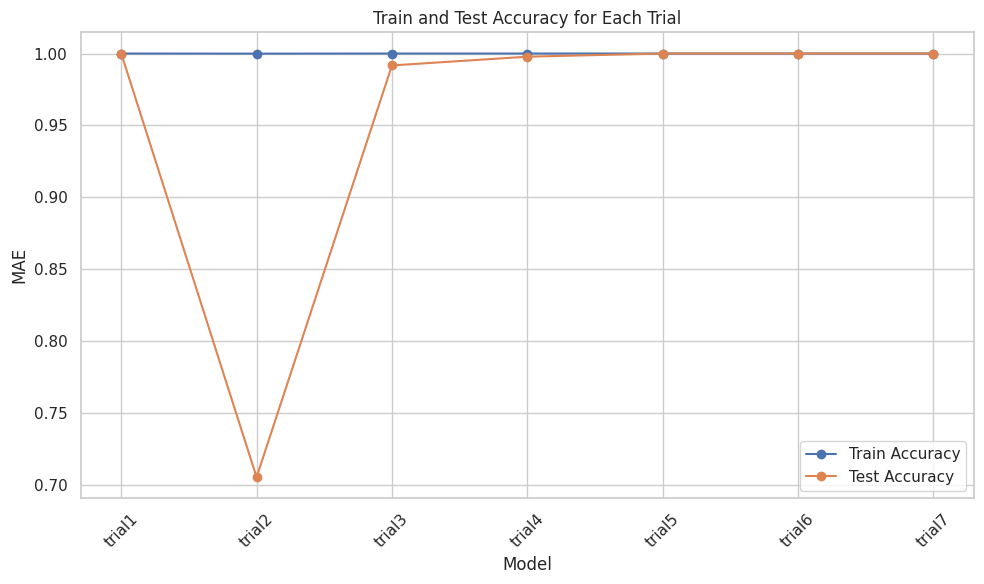

In [263]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(eval_df['model_id'], eval_df['train_accuracy'], marker='o', label='Train Accuracy')
plt.plot(eval_df['model_id'], eval_df['test_accuracy'], marker='o', label='Test Accuracy')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('Train and Test Accuracy for Each Trial')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

# Hyper Parameter Tuning

In [264]:
def hyperparameter_tune(classifier, X, y, param_grid):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=48)
    
    # Create a pipeline with the classifier
    pipeline = Pipeline([
        ("classifier", classifier)
    ])
    
    # Set up GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get the best estimator from the grid search
    best_classifier = grid_search.best_estimator_
    
    y_train_pred = best_classifier.predict(X_train)
    y_test_pred = best_classifier.predict(X_test)
    
       
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    
    
    test_precision = precision_score(y_test, y_test_pred)
    train_precision = precision_score(y_train, y_train_pred)
    
   
    
    test_recall = recall_score(y_test, y_test_pred)
    train_recall = recall_score(y_train, y_train_pred)

   
    
    test_f1 = f1_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    
    print("Best Hyperparameters:", grid_search.best_params_)
    print("Train Accuracy: {:.2f}, Test Accuracy: {:.2f}".format(train_accuracy, test_accuracy))
    print("Train Precision: {:.2f}, Test Precision: {:.2f}".format(train_precision, test_precision))
    print("Train Recall: {:.2f}, Test Recall: {:.2f}".format(train_recall, test_recall))
    print("Train F1 Score: {:.2f}, Test F1 Score: {:.2f}".format(train_f1, test_f1))
    return best_classifier, grid_search

In [265]:
param_grid = {
    "classifier__n_estimators": [10, 25, 50, 75],
    "classifier__max_depth": [None, 5, 10, 15, 20],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4],
    "classifier__bootstrap": [True, False],
    "classifier__n_jobs": [-1]
}

tuning_trial1 = RandomForestClassifier(random_state=0)
best_classifier, grid_search = hyperparameter_tune(tuning_trial1, X, y, param_grid)

Best Hyperparameters: {'classifier__bootstrap': True, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 25, 'classifier__n_jobs': -1}
Train Accuracy: 1.00, Test Accuracy: 1.00
Train Precision: 1.00, Test Precision: 1.00
Train Recall: 1.00, Test Recall: 1.00
Train F1 Score: 1.00, Test F1 Score: 1.00
